In [1]:
import pandas as pd
import numpy as np

from scipy.stats import boxcox
from sklearn.preprocessing import scale 

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
shooting2024 = pd.read_csv('NBA Shooting Data/NBA Shooting Data 2024 - Sheet1.csv')
boxScore2024 = pd.read_csv('Per_36 Box Score Data/NBA Per_36 Box Score Data 2024 - Sheet1.csv')

In [3]:
shooting2024['percJumpshot'] = shooting2024['10-16 (% of FGA)'] + shooting2024['16-3P (% of FGA)'] + shooting2024['3P (% of FGA)']
shooting2024['jumpshotPercentage'] = (shooting2024['10-16%'] * (shooting2024['10-16 (% of FGA)'] / shooting2024['percJumpshot'])) + (shooting2024['16-3P%'] * (shooting2024['16-3P (% of FGA)'] / shooting2024['percJumpshot'])) + (shooting2024['3P%'] * (shooting2024['3P (% of FGA)'] / shooting2024['percJumpshot']))

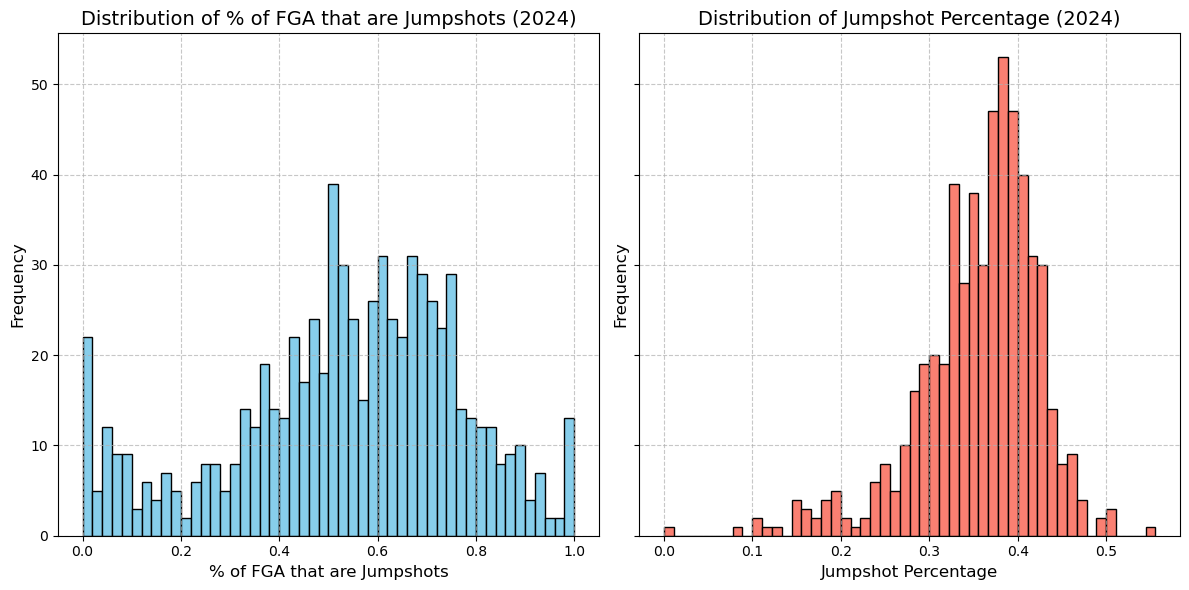

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True, figsize=(12, 6))

# Plot the first histogram
ax1.hist(shooting2024['percJumpshot'], bins=50, color='skyblue', edgecolor='black')
ax1.set_title('Distribution of % of FGA that are Jumpshots (2024)', fontsize=14)
ax1.set_xlabel('% of FGA that are Jumpshots', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot the second histogram
ax2.hist(shooting2024['jumpshotPercentage'], bins=50, color='salmon', edgecolor='black')
ax2.set_title('Distribution of Jumpshot Percentage (2024)', fontsize=14)
ax2.set_xlabel('Jumpshot Percentage', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('histograms.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

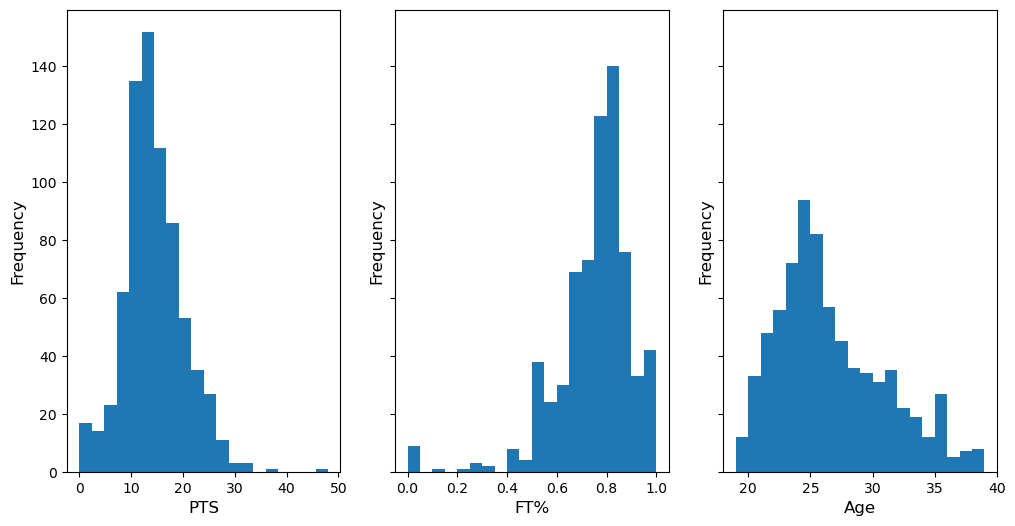

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize=(12, 6))

ax1.hist(boxScore2024['PTS'], bins = 20)
ax1.set_xlabel('PTS', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)

ax2.hist(boxScore2024['FT%'], bins = 20)
ax2.set_xlabel('FT%', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)

ax3.hist(boxScore2024['Age'], bins = 20)
ax3.set_xlabel('Age', fontsize=12)
ax3.set_ylabel('Frequency', fontsize=12)

plt.show()

In [9]:
def data_pre_processing(year):
    # Read in the csvs
    boxScore = pd.read_csv(f"Per_36 Box Score Data/NBA Per_36 Box Score Data {year} - Sheet1.csv")
    shooting = pd.read_csv(f"NBA Shooting Data/NBA Shooting Data {year} - Sheet1.csv")

    # Remove totals for traded players (Dont double count them)
    boxScore = boxScore[(boxScore['Team'] != '2TM') | (boxScore['Team'] != '3TM') | (boxScore['Team'] != '4TM') | (boxScore['Team'] != '5TM')]
    shooting = shooting[(shooting['Team'] != '2TM') | (shooting['Team'] != '3TM') | (shooting['Team'] != '4TM') | (shooting['Team'] != '5TM')]

    # Stats become predictive after 10 - 15 games, so remove small sample sizes
    boxScore = boxScore[boxScore['MP'] > 375]
    shooting = shooting[shooting['MP'] > 375]
    
    # drop unneeded columns
    shooting = shooting.drop(['Rk', 'Age', 'Pos', 'G', 'GS', 'MP', 'FG%', 'avgDistance', '2P (% of FGA)', 
                              '0-3 (% of FGA)', '3-10 (% of FGA)', '2P%', '0-3%', '3-10%', '2P', '3P', 
                              '%FGA', '#', '%3PA', '3P%.1', 'Att.', 'Md.', 'Awards', '-9999'], axis = 1)
    
    # find percentage of shots that are jumpshots and what the players shoot on those shots
    shooting['percJumpshot'] = shooting['10-16 (% of FGA)'] + shooting['16-3P (% of FGA)'] + shooting['3P (% of FGA)']
    shooting['jumpshotPercentage'] = (shooting['10-16%'] * (shooting['10-16 (% of FGA)'] / shooting['percJumpshot'])) + (shooting['16-3P%'] * (shooting['16-3P (% of FGA)'] / shooting['percJumpshot'])) + (shooting['3P%'] * (shooting['3P (% of FGA)'] / shooting['percJumpshot']))
    
    # merge the 2 columns
    df = pd.merge(boxScore, shooting, on = ['Player', 'Team'], how = 'left')

    # drop unneeded columns
    df = df.drop(['Rk', 'Player', 'Team', 'G', 'GS', 'MP', 'FG', '3P', '3PA', '3P%_x', '2P', '2PA', '2P%', 'eFG%', 'FT',
                  'ORB', 'DRB', 'STL', 'BLK', 'TOV', 'Awards', 'Player-additional', '10-16 (% of FGA)', '16-3P (% of FGA)',
                  '3P (% of FGA)', '10-16%', '16-3P%', '3P%_y'], axis = 1)

    # get dummies for Position
    df = pd.get_dummies(df, drop_first = True, dtype = 'int')

    # center and scale predictors
    posIdx = df.apply(lambda x: np.all(x > 0))
    posIdx[-4:] = False
    posIdx = np.array(posIdx)
    
    df.loc[:, posIdx] = df.iloc[:, posIdx].apply(lambda x: boxcox(x + 0.01)[0])
    df.iloc[:, :-4] = df.iloc[:, :-4].apply(lambda x: scale(x))
    
    return df

In [13]:
df2000 = data_pre_processing(2000)
df2001 = data_pre_processing(2001)
df2002 = data_pre_processing(2002)
df2003 = data_pre_processing(2003)
df2004 = data_pre_processing(2004)
df2005 = data_pre_processing(2005)
df2006 = data_pre_processing(2006)
df2007 = data_pre_processing(2007)
df2008 = data_pre_processing(2008)
df2009 = data_pre_processing(2009)
df2010 = data_pre_processing(2010)
df2011 = data_pre_processing(2011)
df2012 = data_pre_processing(2012)
df2013 = data_pre_processing(2013)
df2014 = data_pre_processing(2014)
df2015 = data_pre_processing(2015)
df2016 = data_pre_processing(2016)
df2017 = data_pre_processing(2017)
df2018 = data_pre_processing(2018)
df2019 = data_pre_processing(2019)
df2020 = data_pre_processing(2020)
df2021 = data_pre_processing(2021)
df2022 = data_pre_processing(2022)
df2023 = data_pre_processing(2023)
df2024 = data_pre_processing(2024)

In [14]:
df2024.head()

,Age,FGA,FG%,FTA,FT%,TRB,AST,PF,PTS,percJumpshot,jumpshotPercentage,Pos_PF,Pos_PG,Pos_SF,Pos_SG
0,1.540352,1.082234,0.314024,2.122285,0.830795,-0.872903,0.874340,-1.235303,1.361855,0.496209,0.932216,0,0,1,0
1,0.216192,0.286073,1.590943,1.264266,-0.772113,1.929609,1.756248,0.315104,0.852870,-1.645574,1.126146,0,0,0,0
2,-0.818270,0.795683,-0.188267,0.357066,0.644554,-0.632328,0.874340,-0.655007,0.733128,0.260289,0.264052,0,1,0,0
3,0.216192,1.082234,-0.373979,0.770072,0.358563,-0.521511,0.323608,-1.912110,0.969377,0.611856,0.366690,0,0,1,0
4,-1.450682,1.489298,-0.059275,2.054633,-0.578244,0.482005,1.013476,-1.082505,1.421549,0.005865,0.114580,1,0,0,0


In [17]:
df2024.columns

Index(['Age', 'FGA', 'FG%', 'FTA', 'FT%', 'TRB', 'AST', 'PF', 'PTS',
       'percJumpshot', 'jumpshotPercentage', 'Pos_PF', 'Pos_PG', 'Pos_SF',
       'Pos_SG'],
      dtype='object')

In [19]:
df = pd.concat([df2000, df2001, df2002, df2003, df2004, df2005, df2006, df2007, df2008, df2009, df2010,
                df2011, df2012, df2013, df2014, df2015, df2016, df2017, df2018, df2019, df2020, df2021,
                df2022, df2023, df2024])

df.head()

,Age,FGA,FG%,FTA,FT%,TRB,AST,PF,PTS,percJumpshot,jumpshotPercentage,Pos_PF,Pos_PG,Pos_SF,Pos_SG
0,-0.335046,1.630040,0.319601,-0.022156,0.795720,-0.181355,0.913331,-1.985002,1.382453,0.568160,0.831030,0,0,1,0
1,0.768414,1.778916,0.143809,0.623534,-0.173834,-0.100686,1.782472,-1.823158,1.721239,0.057159,-0.414500,0,1,0,0
2,0.351143,0.811981,-0.114956,0.623534,1.404723,-0.937717,0.515529,-1.669773,0.775377,0.453793,0.614600,0,0,1,0
3,-1.109852,1.600173,1.070183,0.677294,0.146109,1.391362,0.877254,-1.252623,1.676510,0.092170,1.047818,1,0,0,0
4,-1.109852,0.811981,0.473643,1.501009,0.659092,1.047278,0.226062,-0.775497,1.221613,-0.689955,-0.171181,0,0,1,0


In [21]:
df.shape

(10516, 15)

In [23]:
df.isna().sum()

Age                     0
FGA                     0
FG%                     0
FTA                     0
FT%                     0
TRB                     0
AST                     0
PF                      0
PTS                     0
percJumpshot            0
jumpshotPercentage    943
Pos_PF                  0
Pos_PG                  0
Pos_SF                  0
Pos_SG                  0
dtype: int64

In [25]:
percJump = df.drop('jumpshotPercentage', axis = 1)
jumpshotPerc = df

In [27]:
percJump.isna().sum()

Age             0
FGA             0
FG%             0
FTA             0
FT%             0
TRB             0
AST             0
PF              0
PTS             0
percJumpshot    0
Pos_PF          0
Pos_PG          0
Pos_SF          0
Pos_SG          0
dtype: int64

In [29]:
jumpshotPerc = jumpshotPerc.dropna()

In [31]:
jumpshotPerc.isna().sum()

Age                   0
FGA                   0
FG%                   0
FTA                   0
FT%                   0
TRB                   0
AST                   0
PF                    0
PTS                   0
percJumpshot          0
jumpshotPercentage    0
Pos_PF                0
Pos_PG                0
Pos_SF                0
Pos_SG                0
dtype: int64

In [33]:
print(len(percJump))
print(len(jumpshotPerc))

10516
9573


In [35]:
from sklearn.model_selection import RepeatedKFold, cross_validate
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.cross_decomposition import PLSRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

# Percentage of FGAs that are Jumpshots

In [38]:
outcomePercJump = pd.DataFrame(percJump['percJumpshot'])
predictorsPercJump = percJump.drop('percJumpshot', axis = 1)

In [40]:
predictorsPercJump.head()

,Age,FGA,FG%,FTA,FT%,TRB,AST,PF,PTS,Pos_PF,Pos_PG,Pos_SF,Pos_SG
0,-0.335046,1.630040,0.319601,-0.022156,0.795720,-0.181355,0.913331,-1.985002,1.382453,0,0,1,0
1,0.768414,1.778916,0.143809,0.623534,-0.173834,-0.100686,1.782472,-1.823158,1.721239,0,1,0,0
2,0.351143,0.811981,-0.114956,0.623534,1.404723,-0.937717,0.515529,-1.669773,0.775377,0,0,1,0
3,-1.109852,1.600173,1.070183,0.677294,0.146109,1.391362,0.877254,-1.252623,1.676510,1,0,0,0
4,-1.109852,0.811981,0.473643,1.501009,0.659092,1.047278,0.226062,-0.775497,1.221613,0,0,1,0


In [42]:
outcomePercJump.head()

,percJumpshot
0,0.568160
1,0.057159
2,0.453793
3,0.092170
4,-0.689955


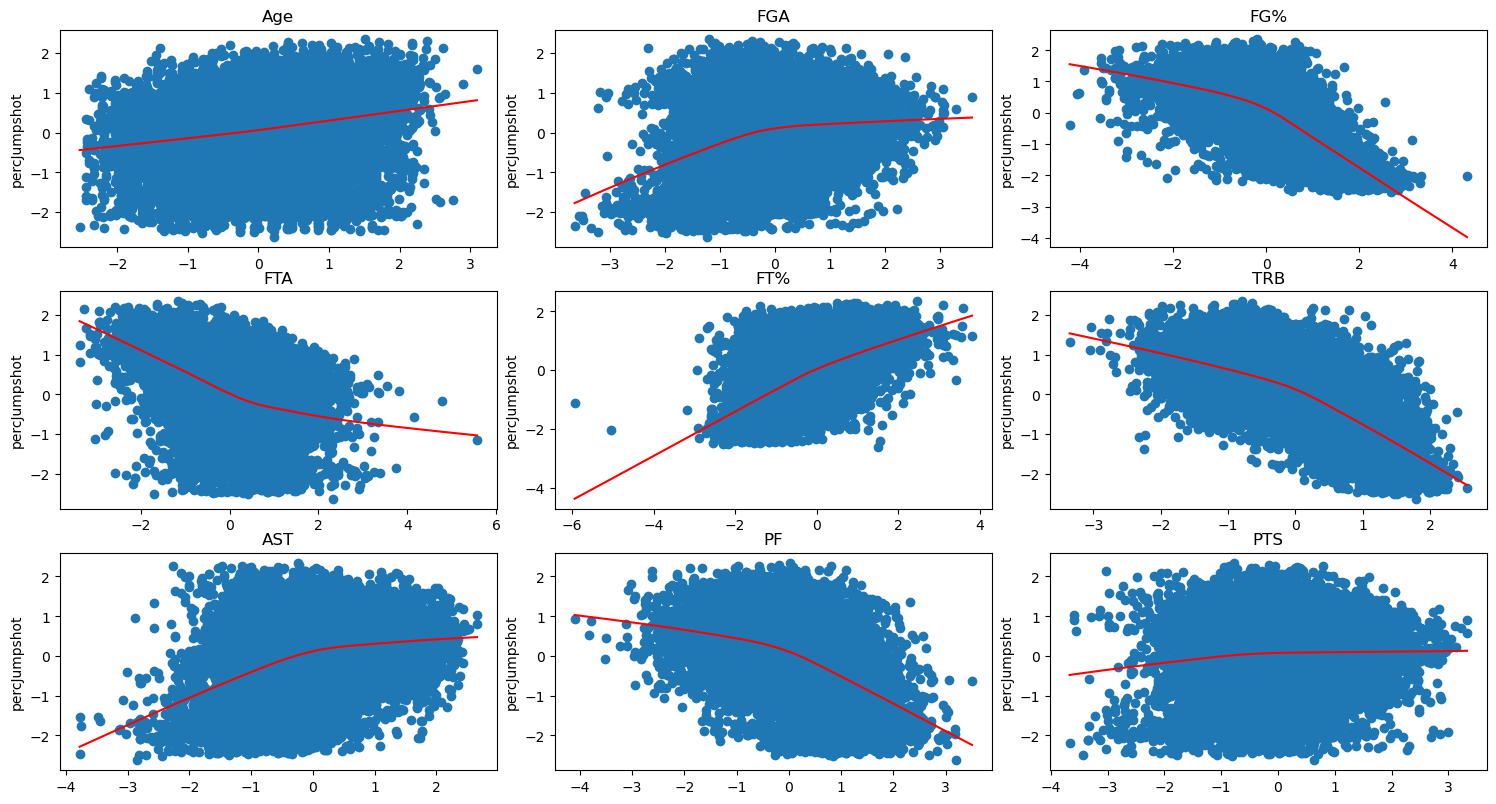

In [44]:
import statsmodels.api as sm

# predictorsContin contains the 9 continuous predictor columns
predictorsContinPercJump = predictorsPercJump[predictorsPercJump.columns[:-4]]

# Run local smoother lowess
lowess = sm.nonparametric.lowess

# Draw scatterplots
nrows = 3
ncols = 3

fig, axs = plt.subplots(nrows, ncols, figsize=(15, 8))
fig.tight_layout()

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Iterate through each column and plot
for i, col in enumerate(predictorsContinPercJump.columns):
    if i >= nrows * ncols:
        break  # Stop if we exceed the number of subplots

    X_graph = predictorsContinPercJump[col]
    z = lowess(np.squeeze(outcomePercJump), np.squeeze(X_graph), frac=0.9)
    
    axs[i].scatter(X_graph, outcomePercJump)
    axs[i].plot(z[:, 0], z[:, 1], 'r')
    axs[i].set_title(col)
    axs[i].set_ylabel(outcomePercJump.columns[0])

# Hide any unused subplots
for j in range(i + 1, nrows * ncols):
    axs[j].axis('off')

plt.show()

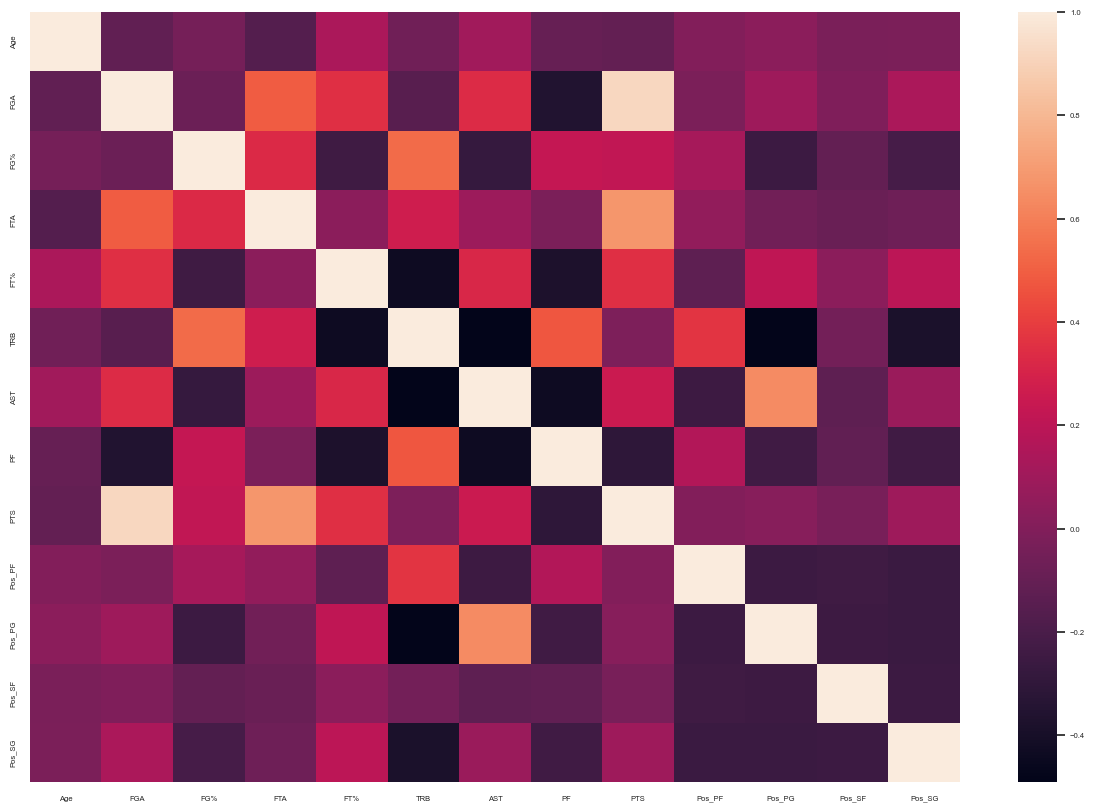

In [45]:
# derive correlation matrix 
corrDataPercJump = predictorsPercJump.corr()
corrDataPercJump.dropna()

# visualize correlation matrix

plt.figure(figsize=(15, 10))
sns.set(font_scale=0.5)
sns.heatmap(corrDataPercJump)
plt.show()

In [46]:
corrDataPercJump

,Age,FGA,FG%,FTA,FT%,TRB,AST,PF,PTS,Pos_PF,Pos_PG,Pos_SF,Pos_SG
Age,1.000000,-0.115152,-0.043251,-0.159943,0.139110,-0.064507,0.104042,-0.098810,-0.109827,0.002284,0.028366,-0.026281,-0.023533
FGA,-0.115152,1.000000,-0.079687,0.491546,0.352200,-0.150753,0.332978,-0.356516,0.920880,-0.019352,0.092009,-0.012489,0.144019
FG%,-0.043251,-0.079687,1.000000,0.324854,-0.243317,0.534662,-0.278685,0.229951,0.218220,0.121688,-0.254940,-0.109919,-0.213582
FTA,-0.159943,0.491546,0.324854,1.000000,0.032762,0.269722,0.089830,-0.021440,0.679293,0.051889,-0.054687,-0.084219,-0.067788
FT%,0.139110,0.352200,-0.243317,0.032762,1.000000,-0.436214,0.313323,-0.378125,0.352601,-0.124905,0.208842,0.030942,0.197724
TRB,-0.064507,-0.150753,0.534662,0.269722,-0.436214,1.000000,-0.490200,0.470777,-0.017238,0.366251,-0.485519,-0.051683,-0.382993
AST,0.104042,0.332978,-0.278685,0.089830,0.313323,-0.490200,1.000000,-0.435146,0.252924,-0.251137,0.643600,-0.124623,0.085841
PF,-0.098810,-0.356516,0.229951,-0.021440,-0.378125,0.470777,-0.435146,1.000000,-0.305574,0.161984,-0.239798,-0.113630,-0.235510
PTS,-0.109827,0.920880,0.218220,0.679293,0.352601,-0.017238,0.252924,-0.305574,1.000000,0.000684,0.019457,-0.032163,0.092112
Pos_PF,0.002284,-0.019352,0.121688,0.051889,-0.124905,0.366251,-0.251137,0.161984,0.000684,1.000000,-0.255114,-0.244927,-0.260401


In [47]:
def eliminateCorr(data, threshold):

    corrData = np.abs(data.corr())
    
    while ((corrData < 1) & (corrData > threshold)).any().any():
    
        bigCorr = 0
        maxCol = ''
        maxInd = ''

        # find the biggest piecewise correlation
        for col in corrData.columns:
            for idx in list(corrData.index):
                if (corrData.loc[idx, col] > bigCorr) & (corrData.loc[idx, col] != 1):
                    bigCorr = corrData.loc[idx, col]
                    maxCol = col
                    maxIdx = idx

        # drop the column with the highest piecewise correlation
        if (np.mean(corrData.loc[maxIdx, :]) > np.mean(corrData.loc[:, maxCol])):
            corrData.drop(maxIdx, axis = 0, inplace = True)
            corrData.drop(maxIdx, axis = 1, inplace = True)
        else:
            corrData.drop(maxCol, axis = 0, inplace = True)
            corrData.drop(maxCol, axis = 1, inplace = True)

    return data[corrData.columns]

In [52]:
predictorsPercJumpReduced = eliminateCorr(predictorsPercJump, 0.75)

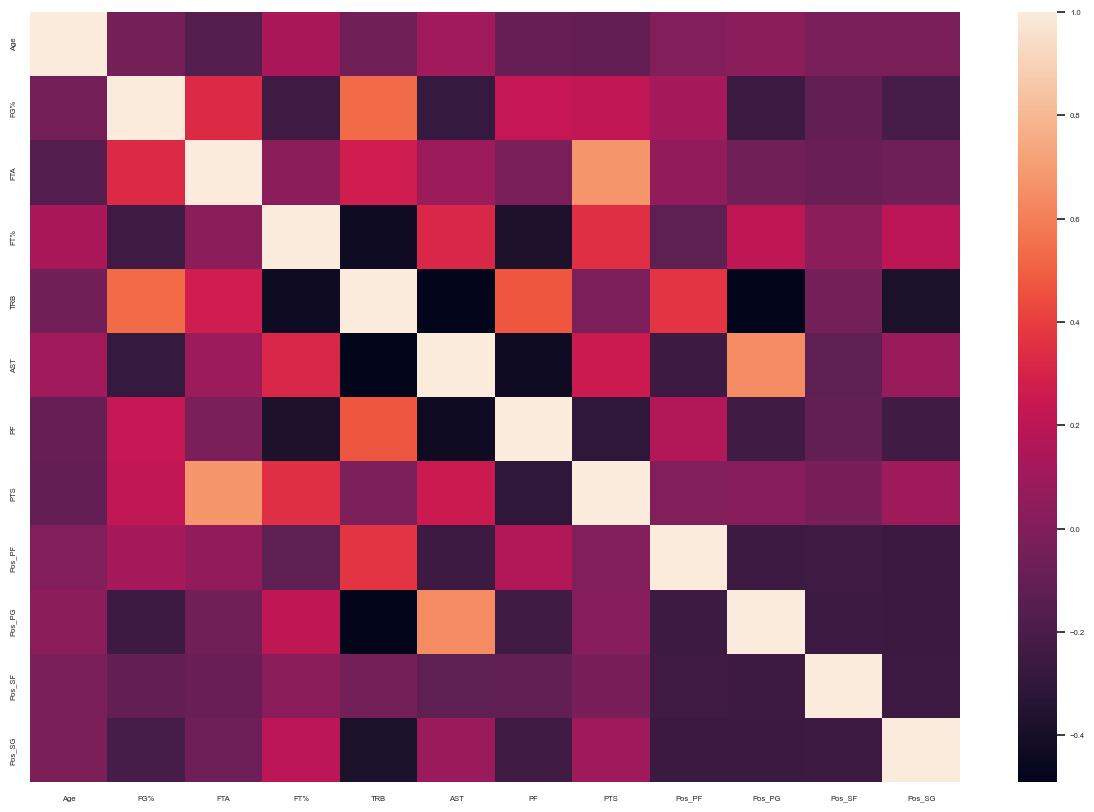

In [54]:
# derive correlation matrix 
corrDataPercJumpReduced = predictorsPercJumpReduced.corr()
corrDataPercJumpReduced.dropna()

# visualize correlation matrix

plt.figure(figsize=(15, 10))
sns.set(font_scale=0.5)
sns.heatmap(corrDataPercJumpReduced)
plt.show()

In [56]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets

xTrainPercJump, xTestPercJump, yTrainPercJump, yTestPercJump = train_test_split(predictorsPercJumpReduced, outcomePercJump, test_size=0.2, random_state = 1)

In [60]:
# designate cvParam to use for less complex models
cvParam = RepeatedKFold(n_splits = 5, n_repeats = 3, random_state = 1)

In [76]:
# instantiate Linear Regression
lmPercJump = LinearRegression()

# calculate cv scores
cvScoresPercJumpLM = cross_validate(lmPercJump, xTrainPercJump, yTrainPercJump, cv = cvParam, scoring = ('r2', 'neg_mean_squared_error'), return_train_score = True)
rmsePercJumpLM = np.sqrt(-1 * np.mean(cvScoresPercJumpLM['train_neg_mean_squared_error']))

print('train set RMSE: ' + str(rmsePercJumpLM))
print('train set r2: ' + str(np.mean(cvScoresPercJumpLM['train_r2'])))

train set RMSE: 0.46344515191888025
train set r2: 0.7849686726572831


In [78]:
# test against the test set
lmPercJump.fit(xTrainPercJump, yTrainPercJump)
yPercJumpPredLm = lmPercJump.predict(xTestPercJump)

testPercJumpR2lm = r2_score(yTestPercJump, yPercJumpPredLm)
testPercJumpRMSElm = np.sqrt(mean_squared_error(yTestPercJump, yPercJumpPredLm))

print('test set RMSE: '+str(testPercJumpRMSElm))
print('test set r2: '+str(testPercJumpR2lm))

test set RMSE: 0.45678209789260377
test set r2: 0.7921667757909524


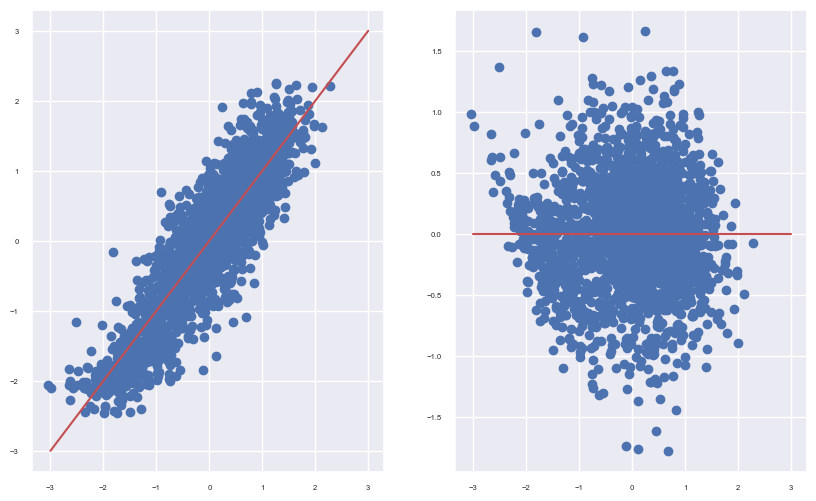

In [72]:
# graph predictions vs test set
yRange = np.linspace(-3, 3)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

ax1.scatter(yPercJumpPredLm, yTestPercJump)
ax1.plot(yRange, yRange, c = 'r')

ax2.scatter(yPercJumpPredLm, yTestPercJump - yPercJumpPredLm)
ax2.plot(yRange, (yRange - yRange), c = 'r')

plt.show()

In [82]:
# instantiate PLS Regression

rmsePercJumpPLS = []
r2PercJumpPLS = []

for i in range(1, 13):
    pls = PLSRegression(n_components = i)
    score = cross_validate(pls, xTrainPercJump, yTrainPercJump, cv = cvParam, scoring = ('r2', 'neg_mean_squared_error'), return_train_score = True)
    rmsePercJumpPLS.append(np.sqrt(-np.mean(score['train_neg_mean_squared_error'])))
    r2PercJumpPLS.append(np.mean(score['train_r2']))

# print minimum RMSE for PLS
print('Minimum RMSE for PLS: ' + str(np.min(rmsePercJumpPLS)))

# number of units used for min RMSE
print('# of components for RMSE PLS: ' + str(np.argmin(rmsePercJumpPLS)))

print('==========================')

# maximum r2 for PLS
print('Maximum r2 for PLS: ' + str(np.max(r2PercJumpPLS)))

# number of units used for max r2
print('# of components for R2 PLS: ' + str(np.argmax(r2PercJumpPLS)))

Minimum RMSE for PLS: 0.46344515191888014
# of components for RMSE PLS: 11
Maximum r2 for PLS: 0.7849686726572831
# of components for R2 PLS: 11


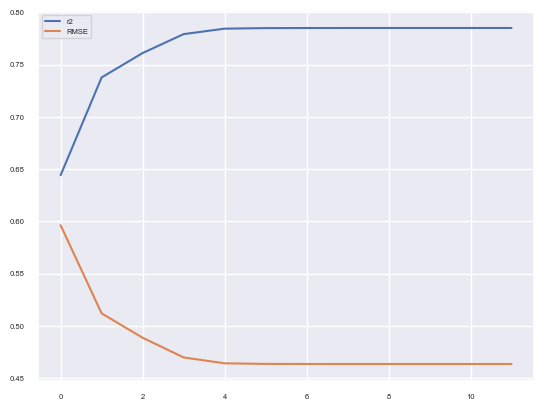

In [84]:
plt.plot(r2PercJumpPLS, label = 'r2')
plt.plot(rmsePercJumpPLS, label = 'RMSE')
plt.legend()
plt.show()

In [86]:
# get predictions
plsPercJump = PLSRegression(n_components = 11)
plsPercJump.fit(xTrainPercJump, yTrainPercJump)
yPercJumpPredPLS = plsPercJump.predict(xTestPercJump)

testPercJumpR2pls = r2_score(yTestPercJump, yPercJumpPredPLS)
testPercJumpRMSEpls = np.sqrt(mean_squared_error(yTestPercJump, yPercJumpPredPLS))

print('test RMSE: '+str(testPercJumpRMSEpls))
print('test r2: '+str(testPercJumpR2pls))

test RMSE: 0.456784472224797
test r2: 0.7921646151703858


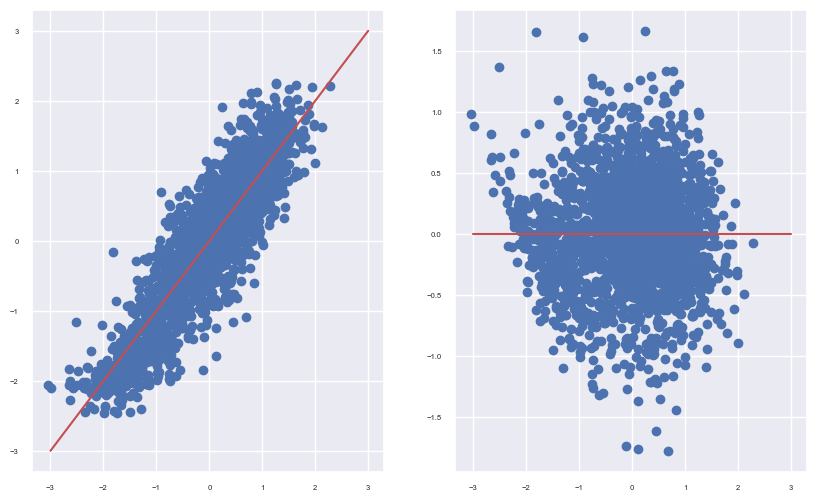

In [88]:
# graph predictions vs test set
yRange = np.linspace(-3, 3)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

ax1.scatter(yPercJumpPredPLS, yTestPercJump)
ax1.plot(yRange, yRange, c = 'r')

ax2.scatter(yPercJumpPredPLS, yTestPercJump - yPercJumpPredPLS)
ax2.plot(yRange, (yRange - yRange), c = 'r')

plt.show()

In [92]:
# Grid Search Ridge Regression
ridgeParam = {'alpha': np.linspace(0, 50, 51)}

gsRidgePercJump = GridSearchCV(Ridge(), ridgeParam, cv = cvParam, scoring = ('r2', 'neg_mean_squared_error'), refit = 'r2', return_train_score = True, n_jobs = -1)
gsRidgePercJump.fit(xTrainPercJump, yTrainPercJump)
cvResultsRidgePercJump = pd.DataFrame(gsRidgePercJump.cv_results_)[['params', 'mean_train_r2', 'mean_train_neg_mean_squared_error']]

print('Best Train r2: ' + str(cvResultsRidgePercJump['mean_train_r2'].max()))
print('Best Train RMSE: ' + str(np.sqrt(-1 * (cvResultsRidgePercJump['mean_train_neg_mean_squared_error'].max()))))
print('Best Params: ' + str(gsRidgePercJump.best_params_))

Best Train r2: 0.7849686726572831
Best Train RMSE: 0.4634451519188802
Best Params: {'alpha': 5.0}


In [94]:
# test against the test set
yPercJumpPredRidge = gsRidgePercJump.predict(xTestPercJump)

testPercJumpR2ridge = r2_score(yTestPercJump, yPercJumpPredRidge)
testPercJumpRMSEridge = np.sqrt(mean_squared_error(yTestPercJump, yPercJumpPredRidge))

print('test RMSE: '+str(testPercJumpRMSEridge))
print('test r2: '+str(testPercJumpR2ridge))

test RMSE: 0.4567128791844079
test r2: 0.7922297592457567


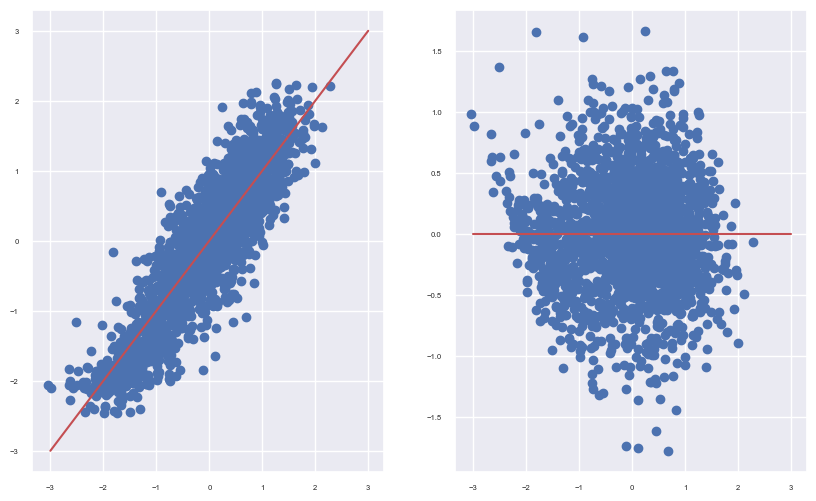

In [96]:
# graph predictions vs test set
yRange = np.linspace(-3, 3)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

ax1.scatter(yPercJumpPredRidge, yTestPercJump)
ax1.plot(yRange, yRange, c = 'r')

ax2.scatter(yPercJumpPredRidge, yTestPercJump - yPercJumpPredRidge)
ax2.plot(yRange, (yRange - yRange), c = 'r')

plt.show()

In [106]:
# Grid Search SVM model
svmParams = {'kernel': ['poly','rbf'],
             'epsilon': [0.01, 0.05, 0.1, 0.5, 1],
             'C': [0.1, 1, 5, 10, 15, 25]}

gsPercJumpSVM = GridSearchCV(SVR(), svmParams, cv = 5, scoring = ('r2', 'neg_mean_squared_error'), refit = 'r2', return_train_score = True, n_jobs = -1)
gsPercJumpSVM.fit(xTrainPercJump, np.ravel(yTrainPercJump))

# get cv scores
cvResultsSVMPercJump = pd.DataFrame(gsPercJumpSVM.cv_results_)[['params', 'mean_train_r2', 'mean_train_neg_mean_squared_error']]

print('Best r2: ' + str(cvResultsSVMPercJump.loc[(cvResultsSVMPercJump['params'] == gsPercJumpSVM.best_params_), 'mean_train_r2']))
print('Best RMSE: ' + str(np.sqrt(-1 * (cvResultsSVMPercJump.loc[(cvResultsSVMPercJump['params'] == gsPercJumpSVM.best_params_), 'mean_train_neg_mean_squared_error']))))
print('Best Params: ' + str(gsPercJumpSVM.best_params_))

Best r2: 15    0.847281
Name: mean_train_r2, dtype: float64
Best RMSE: 15    0.390568
Name: mean_train_neg_mean_squared_error, dtype: float64
Best Params: {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}


In [108]:
# test against the test set
yPercJumpPredSVR = gsPercJumpSVM.predict(xTestPercJump)

testPercJumpR2svr = r2_score(yTestPercJump, yPercJumpPredSVR)
testPercJumpRMSEsvr = np.sqrt(mean_squared_error(yTestPercJump, yPercJumpPredSVR))

print('test RMSE: '+str(testPercJumpRMSEsvr))
print('test r2: '+str(testPercJumpR2svr))

test RMSE: 0.4267417427996195
test r2: 0.8186042621283562


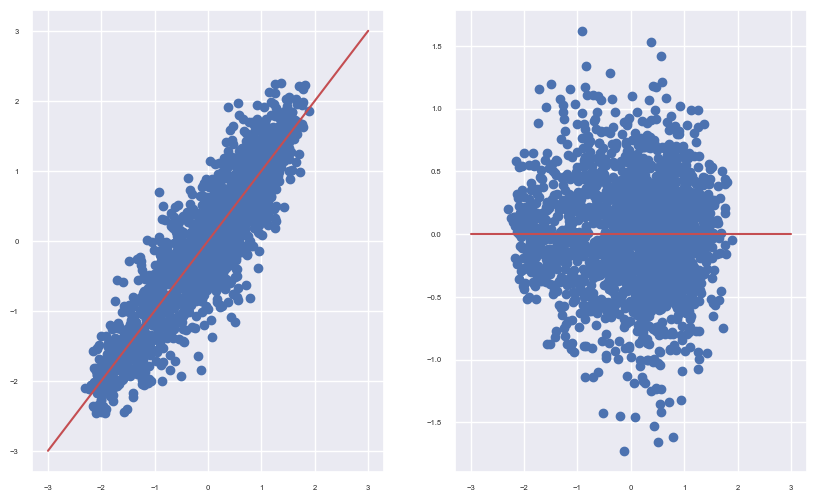

In [110]:
# graph predictions vs test set
yRange = np.linspace(-3, 3)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

ax1.scatter(yPercJumpPredSVR, yTestPercJump)
ax1.plot(yRange, yRange, c = 'r')

ax2.scatter(yPercJumpPredSVR, (yTestPercJump - yPercJumpPredSVR.reshape(yTestPercJump.shape)))
ax2.plot(yRange, (yRange - yRange), c = 'r')

plt.show()

In [112]:
# Grid Search MLPRegressor
mlpParams = {'hidden_layer_sizes': [(10, ), (50, ), (100, ), (50, 20, ), (100, 50, ), (50, 30, 10, ), (100, 50, 20, ), (50, 30, 20, 10, )],
            'alpha': [0.00, 0.0001, 0.001, 0.01, 0.1, 1],
            'max_iter': [1000]}

gsPercJumpMLP = GridSearchCV(MLPRegressor(), mlpParams, cv = 5, scoring = ('r2', 'neg_mean_squared_error'), refit = 'r2', return_train_score = True, n_jobs = -1)
gsPercJumpMLP.fit(xTrainPercJump, np.ravel(yTrainPercJump))

# get cv scores
cvResultsMLPPercJump = pd.DataFrame(gsPercJumpMLP.cv_results_)[['params', 'mean_train_r2', 'mean_train_neg_mean_squared_error']]

print('Best r2: ' + str(cvResultsMLPPercJump.loc[(cvResultsMLPPercJump['params'] == gsPercJumpMLP.best_params_), 'mean_train_r2']))
print('Best RMSE: ' + str(np.sqrt(-1 * (cvResultsMLPPercJump.loc[(cvResultsMLPPercJump['params'] == gsPercJumpMLP.best_params_), 'mean_train_neg_mean_squared_error']))))
print('Best Params: ' + str(gsPercJumpMLP.best_params_))

Best r2: 34    0.839798
Name: mean_train_r2, dtype: float64
Best RMSE: 34    0.400025
Name: mean_train_neg_mean_squared_error, dtype: float64
Best Params: {'alpha': 0.1, 'hidden_layer_sizes': (100,), 'max_iter': 1000}


In [114]:
# test against the test set
yPercJumpPredMLP = gsPercJumpMLP.predict(xTestPercJump)

testPercJumpR2mlp = r2_score(yTestPercJump, yPercJumpPredMLP)
testPercJumpRMSEmlp = np.sqrt(mean_squared_error(yTestPercJump, yPercJumpPredMLP))

print('test RMSE: '+str(testPercJumpRMSEmlp))
print('test r2: '+str(testPercJumpR2mlp))

test RMSE: 0.4262094898539261
test r2: 0.8190564710229349


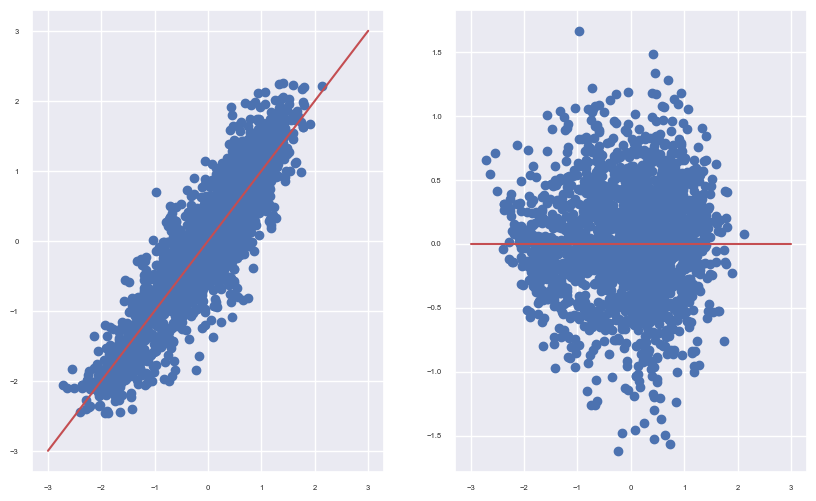

In [116]:
# graph predictions vs test set
yRange = np.linspace(-3, 3)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

ax1.scatter(yPercJumpPredMLP, yTestPercJump)
ax1.plot(yRange, yRange, c = 'r')

ax2.scatter(yPercJumpPredMLP, yTestPercJump - yPercJumpPredMLP.reshape(yTestPercJump.shape))
ax2.plot(yRange, (yRange - yRange), c = 'r')

plt.show()

In [138]:
# Grid Search Random Forest Regressor
rfrParams = {'n_estimators': [500, 1000],
             'max_depth': [10, 20, 30],
             'max_features': ['sqrt', 0.5],
             'min_samples_leaf': [10, 20, 40],
             'min_samples_split': [20, 40, 80],
             'random_state': [1],
             'oob_score': [True],
             'criterion': ['squared_error']}

gsPercJumpRFR = GridSearchCV(RandomForestRegressor(), rfrParams, cv = 5, scoring = ('r2', 'neg_mean_squared_error'), refit = 'r2', return_train_score = True, n_jobs = -1)
gsPercJumpRFR.fit(xTrainPercJump, np.ravel(yTrainPercJump))

# get cv scores
cvResultsRFRPercJump = pd.DataFrame(gsPercJumpRFR.cv_results_)[['params', 'mean_train_r2', 'mean_train_neg_mean_squared_error']]

print('Best r2: ' + str(cvResultsRFRPercJump.loc[(cvResultsRFRPercJump['params'] == gsPercJumpRFR.best_params_), 'mean_train_r2']))
print('Best RMSE: ' + str(np.sqrt(-1 * (cvResultsRFRPercJump.loc[(cvResultsRFRPercJump['params'] == gsPercJumpRFR.best_params_), 'mean_train_neg_mean_squared_error']))))
print('Best Params: ' + str(gsPercJumpRFR.best_params_))

Best r2: 91    0.859089
Name: mean_train_r2, dtype: float64
Best RMSE: 91    0.375168
Name: mean_train_neg_mean_squared_error, dtype: float64
Best Params: {'criterion': 'squared_error', 'max_depth': 30, 'max_features': 0.5, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 1000, 'oob_score': True, 'random_state': 1}


In [140]:
# test against the test set
yPercJumpPredRFR = gsPercJumpRFR.predict(xTestPercJump)

testPercJumpR2rfr = r2_score(yTestPercJump, yPercJumpPredRFR)
testPercJumpRMSErfr = np.sqrt(mean_squared_error(yTestPercJump, yPercJumpPredRFR))

print('test RMSE: '+str(testPercJumpRMSErfr))
print('test r2: '+str(testPercJumpR2rfr))

test RMSE: 0.4554897765339263
test r2: 0.7933411097862499


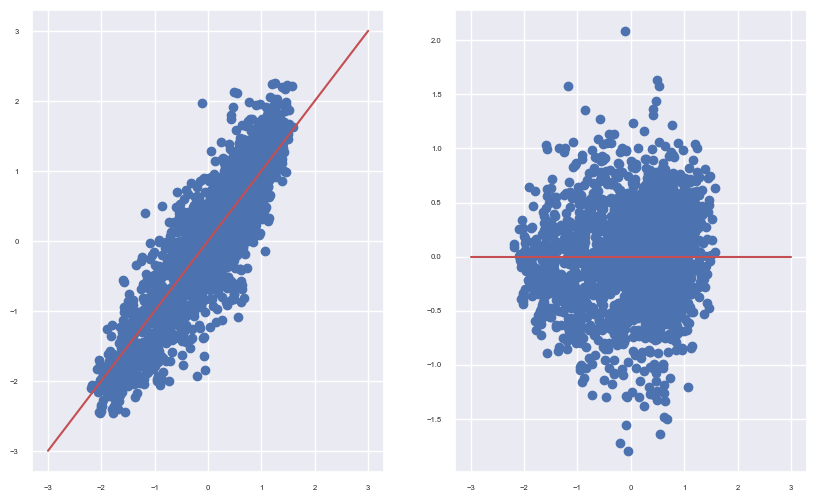

In [142]:
# graph predictions vs test set
yRange = np.linspace(-3, 3)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

ax1.scatter(yPercJumpPredRFR, yTestPercJump)
ax1.plot(yRange, yRange, c = 'r')

ax2.scatter(yPercJumpPredRFR, yTestPercJump - yPercJumpPredRFR.reshape(yTestPercJump.shape))
ax2.plot(yRange, (yRange - yRange), c = 'r')

plt.show()

In [148]:
#look at the variable importance for our analysis
percJumpVarImpRFR = pd.DataFrame({'features':xTestPercJump.columns, 'importance':gsPercJumpRFR.best_estimator_.feature_importances_})

percJumpVarImpRFR["importance"] = percJumpVarImpRFR["importance"] / percJumpVarImpRFR["importance"].sum()

percJumpVarImpRFR

,features,importance
0,Age,0.023807
1,FG%,0.272474
2,FTA,0.104703
3,FT%,0.147773
4,TRB,0.355784
5,AST,0.019308
6,PF,0.033114
7,PTS,0.037022
8,Pos_PF,0.002296
9,Pos_PG,0.000913


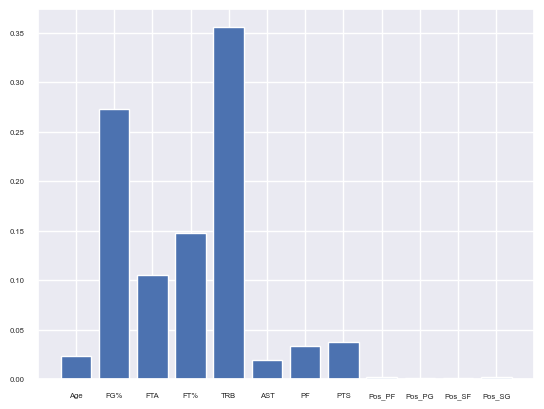

In [150]:
plt.bar(percJumpVarImpRFR['features'], percJumpVarImpRFR['importance'])
plt.show()

# Jumpshot Percentage

In [152]:
outcomeJumpPerc = pd.DataFrame(jumpshotPerc['jumpshotPercentage'])
predictorsJumpPerc = jumpshotPerc.drop('jumpshotPercentage', axis = 1)

In [154]:
predictorsJumpPerc.head()

,Age,FGA,FG%,FTA,FT%,TRB,AST,PF,PTS,percJumpshot,Pos_PF,Pos_PG,Pos_SF,Pos_SG
0,-0.335046,1.630040,0.319601,-0.022156,0.795720,-0.181355,0.913331,-1.985002,1.382453,0.568160,0,0,1,0
1,0.768414,1.778916,0.143809,0.623534,-0.173834,-0.100686,1.782472,-1.823158,1.721239,0.057159,0,1,0,0
2,0.351143,0.811981,-0.114956,0.623534,1.404723,-0.937717,0.515529,-1.669773,0.775377,0.453793,0,0,1,0
3,-1.109852,1.600173,1.070183,0.677294,0.146109,1.391362,0.877254,-1.252623,1.676510,0.092170,1,0,0,0
4,-1.109852,0.811981,0.473643,1.501009,0.659092,1.047278,0.226062,-0.775497,1.221613,-0.689955,0,0,1,0


In [156]:
outcomeJumpPerc.head()

,jumpshotPercentage
0,0.831030
1,-0.414500
2,0.614600
3,1.047818
4,-0.171181


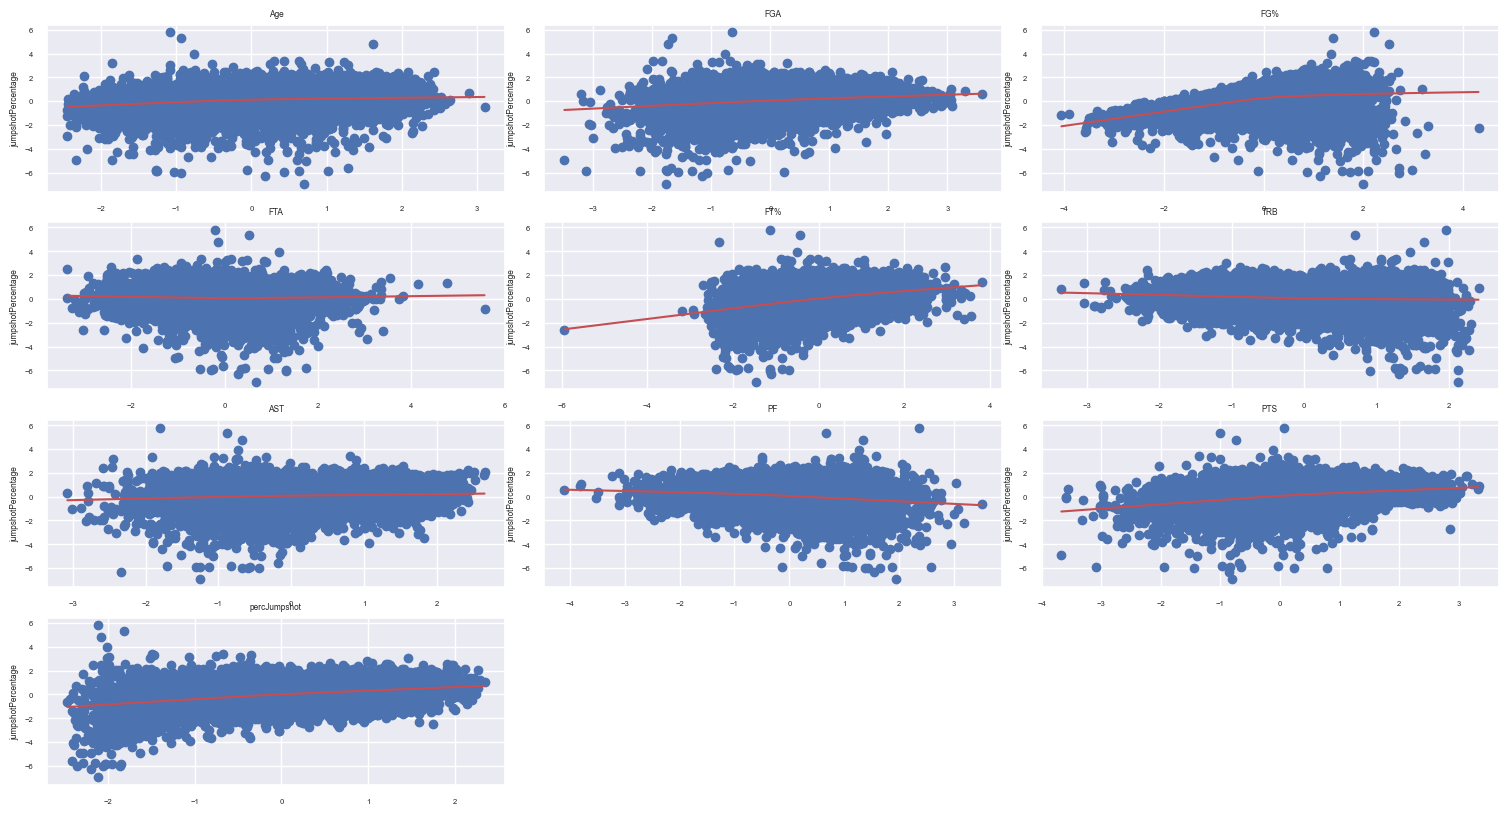

In [158]:
import statsmodels.api as sm

# predictorsContin contains the 9 continuous predictor columns
predictorsContinJumpPerc = predictorsJumpPerc[predictorsJumpPerc.columns[:-4]]

# Run local smoother lowess
lowess = sm.nonparametric.lowess

# Draw scatterplots
nrows = 4
ncols = 3

fig, axs = plt.subplots(nrows, ncols, figsize=(15, 8))
fig.tight_layout()

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Iterate through each column and plot
for i, col in enumerate(predictorsContinJumpPerc.columns):
    if i >= nrows * ncols:
        break  # Stop if we exceed the number of subplots

    X_graph = predictorsContinJumpPerc[col]
    z = lowess(np.squeeze(outcomeJumpPerc), np.squeeze(X_graph), frac=0.9)
    
    axs[i].scatter(X_graph, outcomeJumpPerc)
    axs[i].plot(z[:, 0], z[:, 1], 'r')
    axs[i].set_title(col)
    axs[i].set_ylabel(outcomeJumpPerc.columns[0])

# Hide any unused subplots
for j in range(i + 1, nrows * ncols):
    axs[j].axis('off')

plt.show()

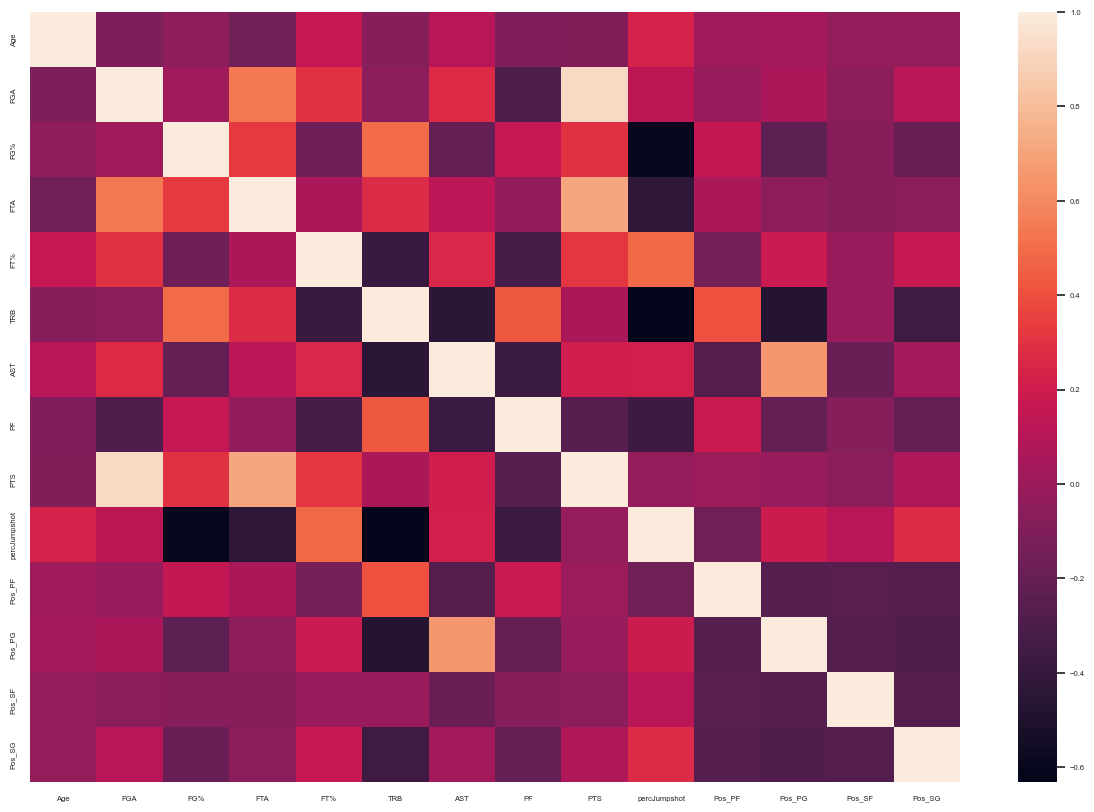

In [159]:
# derive correlation matrix 
corrDataJumpPerc = predictorsJumpPerc.corr()
corrDataJumpPerc.dropna()

# visualize correlation matrix

plt.figure(figsize=(15, 10))
sns.set(font_scale=0.5)
sns.heatmap(corrDataJumpPerc)
plt.show()

In [160]:
corrDataJumpPerc

,Age,FGA,FG%,FTA,FT%,TRB,AST,PF,PTS,percJumpshot,Pos_PF,Pos_PG,Pos_SF,Pos_SG
Age,1.000000,-0.110520,-0.045232,-0.159867,0.153202,-0.078204,0.113736,-0.106259,-0.100375,0.231689,0.009164,0.032019,-0.026378,-0.022308
FGA,-0.110520,1.000000,0.013688,0.538951,0.293372,-0.061919,0.264540,-0.297834,0.923060,0.128981,-0.019105,0.051058,-0.051968,0.113044
FG%,-0.045232,0.013688,1.000000,0.329072,-0.170356,0.495954,-0.205144,0.153782,0.295714,-0.605588,0.150906,-0.233937,-0.076510,-0.185918
FTA,-0.159867,0.538951,0.329072,1.000000,0.051715,0.272997,0.124939,-0.035816,0.707887,-0.429511,0.053734,-0.051180,-0.078545,-0.061783
FT%,0.153202,0.293372,-0.170356,0.051715,1.000000,-0.385418,0.248635,-0.332549,0.317545,0.488092,-0.146078,0.180168,-0.004493,0.170920
TRB,-0.078204,-0.061919,0.495954,0.272997,-0.385418,1.000000,-0.441101,0.427717,0.051901,-0.631905,0.404700,-0.473415,-0.003156,-0.358929
AST,0.113736,0.264540,-0.205144,0.124939,0.248635,-0.441101,1.000000,-0.380410,0.206338,0.215452,-0.276668,0.653921,-0.186039,0.035948
PF,-0.106259,-0.297834,0.153782,-0.035816,-0.332549,0.427717,-0.380410,1.000000,-0.267228,-0.373205,0.180681,-0.209978,-0.078373,-0.206396
PTS,-0.100375,0.923060,0.295714,0.707887,0.317545,0.051901,0.206338,-0.267228,1.000000,-0.020104,0.005419,-0.013939,-0.058725,0.069627
percJumpshot,0.231689,0.128981,-0.605588,-0.429511,0.488092,-0.631905,0.215452,-0.373205,-0.020104,1.000000,-0.163856,0.186084,0.108757,0.268376


In [161]:
predictorsJumpPercReduced = eliminateCorr(predictorsJumpPerc, 0.75)

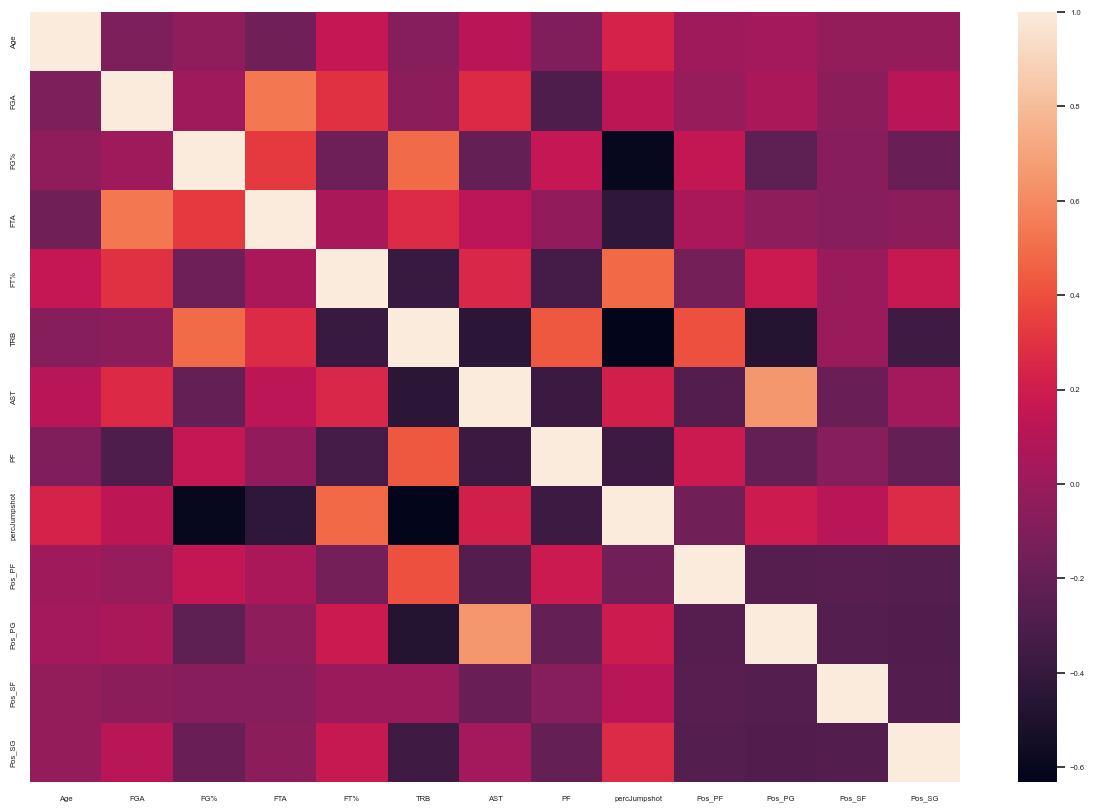

In [162]:
# derive correlation matrix 
corrDataJumpPercReduced = predictorsJumpPercReduced.corr()
corrDataJumpPercReduced.dropna()

# visualize correlation matrix

plt.figure(figsize=(15, 10))
sns.set(font_scale=0.5)
sns.heatmap(corrDataJumpPercReduced)
plt.show()

In [168]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets

xTrainJumpPerc, xTestJumpPerc, yTrainJumpPerc, yTestJumpPerc = train_test_split(predictorsJumpPercReduced, outcomeJumpPerc, test_size=0.2, random_state = 1)

In [170]:
# instantiate Linear Regression
lmJumpPerc = LinearRegression()

# calculate cv scores
cvScoresJumpPercLM = cross_validate(lmJumpPerc, xTrainJumpPerc, yTrainJumpPerc, cv = cvParam, scoring = ('r2', 'neg_mean_squared_error'), return_train_score = True)
rmseJumpPercLM = np.sqrt(-1 * np.mean(cvScoresJumpPercLM['train_neg_mean_squared_error']))

print('train RMSE: ' + str(rmseJumpPercLM))
print('train r2: ' + str(np.mean(cvScoresJumpPercLM['train_r2'])))

train RMSE: 0.6936480360726155
train r2: 0.5237876147571728


In [172]:
# test against the test set
lmJumpPerc.fit(xTrainJumpPerc, yTrainJumpPerc)
yJumpPercPredLm = lmJumpPerc.predict(xTestJumpPerc)

testJumpPercR2lm = r2_score(yTestJumpPerc, yJumpPercPredLm)
testJumpPercRMSElm = np.sqrt(mean_squared_error(yTestJumpPerc, yJumpPercPredLm))

print('test RMSE: '+str(testJumpPercRMSElm))
print('test r2: '+str(testJumpPercR2lm))

test RMSE: 0.7021752068197735
test r2: 0.4854758157785294


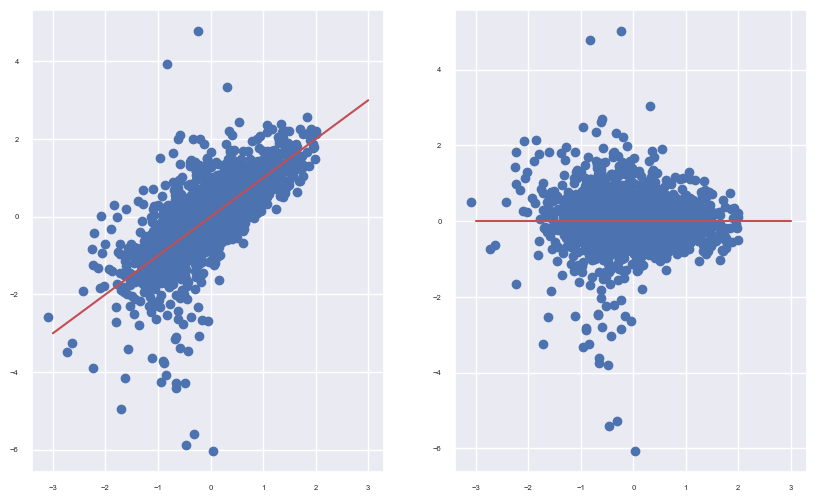

In [174]:
# graph predictions vs test set
yRange = np.linspace(-3, 3)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

ax1.scatter(yJumpPercPredLm, yTestJumpPerc)
ax1.plot(yRange, yRange, c = 'r')

ax2.scatter(yJumpPercPredLm, yTestJumpPerc - yJumpPercPredLm)
ax2.plot(yRange, (yRange - yRange), c = 'r')

plt.show()

In [176]:
# instantiate PLS Regression

rmseJumpPercPLS = []
r2JumpPercPLS = []

for i in range(1, 13):
    pls = PLSRegression(n_components = i)
    score = cross_validate(pls, xTrainJumpPerc, yTrainJumpPerc, cv = cvParam, scoring = ('r2', 'neg_mean_squared_error'), return_train_score = True)
    rmseJumpPercPLS.append(np.sqrt(-np.mean(score['train_neg_mean_squared_error'])))
    r2JumpPercPLS.append(np.mean(score['train_r2']))

# print minimum RMSE for PLS
print('Minimum RMSE for PLS: ' + str(np.min(rmseJumpPercPLS)))

# number of units used for min RMSE
print('# of components for RMSE PLS: ' + str(np.argmin(rmseJumpPercPLS)))

print('==========================')

# maximum r2 for PLS
print('Maximum r2 for PLS: ' + str(np.max(r2JumpPercPLS)))

# number of units used for max r2
print('# of components for R2 PLS: ' + str(np.argmax(r2JumpPercPLS)))

Minimum RMSE for PLS: 0.6936480380591652
# of components for RMSE PLS: 11
Maximum r2 for PLS: 0.5237876120314241
# of components for R2 PLS: 11


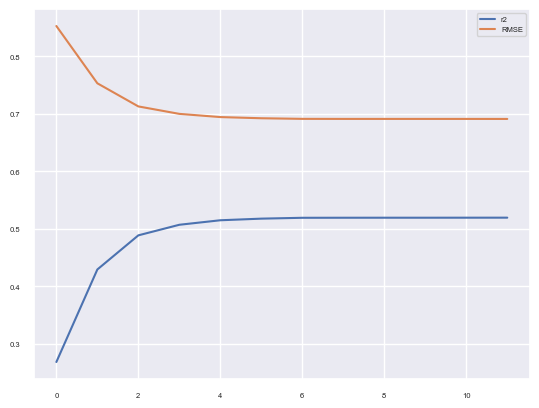

In [146]:
plt.plot(r2JumpPercPLS, label = 'r2')
plt.plot(rmseJumpPercPLS, label = 'RMSE')
plt.legend()
plt.show()

In [178]:
# get predictions
plsJumpPerc = PLSRegression(n_components = 11)
plsJumpPerc.fit(xTrainJumpPerc, yTrainJumpPerc)
yJumpPercPredPLS = plsJumpPerc.predict(xTestJumpPerc)

testJumpPercR2pls = r2_score(yTestJumpPerc, yJumpPercPredPLS)
testJumpPercRMSEpls = np.sqrt(mean_squared_error(yTestJumpPerc, yJumpPercPredPLS))

print('test RMSE: '+str(testJumpPercRMSEpls))
print('test r2: '+str(testJumpPercR2pls))

test RMSE: 0.7021908879184633
test r2: 0.4854528346350083


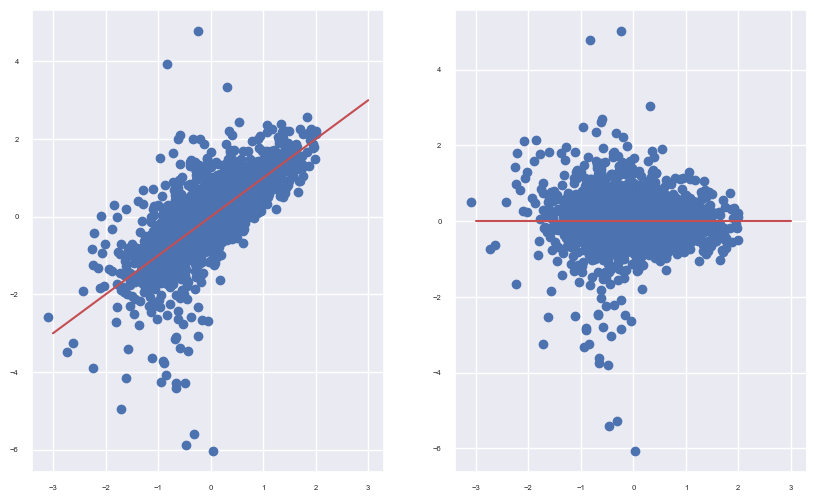

In [180]:
# graph predictions vs test set
yRange = np.linspace(-3, 3)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

ax1.scatter(yJumpPercPredPLS, yTestJumpPerc)
ax1.plot(yRange, yRange, c = 'r')

ax2.scatter(yJumpPercPredPLS, yTestJumpPerc - yJumpPercPredPLS)
ax2.plot(yRange, (yRange - yRange), c = 'r')

plt.show()

In [182]:
# Grid Search Ridge Regression
ridgeParam = {'alpha': np.linspace(0, 50, 51)}

gsRidgeJumpPerc = GridSearchCV(Ridge(), ridgeParam, cv = cvParam, scoring = ('r2', 'neg_mean_squared_error'), refit = 'r2', return_train_score = True, n_jobs = -1)
gsRidgeJumpPerc.fit(xTrainJumpPerc, yTrainJumpPerc)
cvResultsRidgeJumpPerc = pd.DataFrame(gsRidgeJumpPerc.cv_results_)[['params', 'mean_train_r2', 'mean_train_neg_mean_squared_error']]

print('Best Train r2: ' + str(cvResultsRidgeJumpPerc['mean_train_r2'].max()))
print('Best Train RMSE: ' + str(np.sqrt(-1 * (cvResultsRidgeJumpPerc['mean_train_neg_mean_squared_error'].max()))))
print('Best Params: ' + str(gsRidgeJumpPerc.best_params_))

Best Train r2: 0.5237876147571728
Best Train RMSE: 0.6936480360726155
Best Params: {'alpha': 10.0}


In [184]:
# test against the test set
yJumpPercPredRidge = gsRidgeJumpPerc.predict(xTestJumpPerc)

testJumpPercR2ridge = r2_score(yTestJumpPerc, yJumpPercPredRidge)
testJumpPercRMSEridge = np.sqrt(mean_squared_error(yTestJumpPerc, yJumpPercPredRidge))

print('test RMSE: '+str(testJumpPercRMSEridge))
print('test r2: '+str(testJumpPercR2ridge))

test RMSE: 0.7022531817788565
test r2: 0.48536153595366605


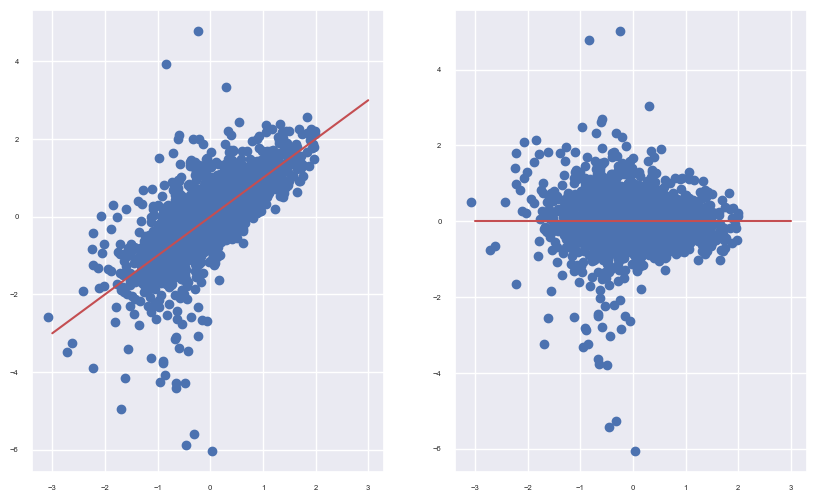

In [186]:
# graph predictions vs test set
yRange = np.linspace(-3, 3)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

ax1.scatter(yJumpPercPredRidge, yTestJumpPerc)
ax1.plot(yRange, yRange, c = 'r')

ax2.scatter(yJumpPercPredRidge, yTestJumpPerc - yJumpPercPredRidge)
ax2.plot(yRange, (yRange - yRange), c = 'r')

plt.show()

In [188]:
# Grid Search SVM model
svmParams = {'kernel': ['poly','rbf'],
             'epsilon': [0.01, 0.05, 0.1, 0.5, 1],
             'C': [0.1, 1, 5, 10, 15, 25]}

gsJumpPercSVM = GridSearchCV(SVR(), svmParams, cv = 5, scoring = ('r2', 'neg_mean_squared_error'), refit = 'r2', return_train_score = True, n_jobs = -1)
gsJumpPercSVM.fit(xTrainJumpPerc, np.ravel(yTrainJumpPerc))

# get cv scores
cvResultsSVMJumpPerc = pd.DataFrame(gsJumpPercSVM.cv_results_)[['params', 'mean_train_r2', 'mean_train_neg_mean_squared_error']]

print('Best r2: ' + str(cvResultsSVMJumpPerc.loc[(cvResultsSVMJumpPerc['params'] == gsJumpPercSVM.best_params_), 'mean_train_r2']))
print('Best RMSE: ' + str(np.sqrt(-1 * (cvResultsSVMJumpPerc.loc[(cvResultsSVMJumpPerc['params'] == gsJumpPercSVM.best_params_), 'mean_train_neg_mean_squared_error']))))
print('Best Params: ' + str(gsJumpPercSVM.best_params_))

Best r2: 15    0.634751
Name: mean_train_r2, dtype: float64
Best RMSE: 15    0.607378
Name: mean_train_neg_mean_squared_error, dtype: float64
Best Params: {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}


In [190]:
# test against the test set
yJumpPercPredSVR = gsJumpPercSVM.predict(xTestJumpPerc)

testJumpPercR2svr = r2_score(yTestJumpPerc, yJumpPercPredSVR)
testJumpPercRMSEsvr = np.sqrt(mean_squared_error(yTestJumpPerc, yJumpPercPredSVR))

print('test RMSE: '+str(testJumpPercRMSEsvr))
print('test r2: '+str(testJumpPercR2svr))

test RMSE: 0.6752435007903586
test r2: 0.5241877305986271


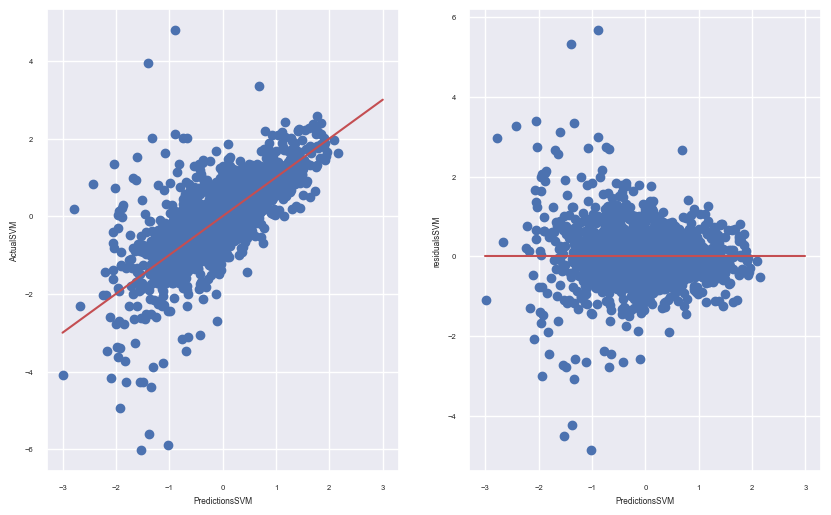

In [269]:
# graph predictions vs test set
yRange = np.linspace(-3, 3)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

ax1.scatter(yJumpPercPredSVR, yTestJumpPerc)
ax1.plot(yRange, yRange, c = 'r')
ax1.set_xlabel('PredictionsSVM')
ax1.set_ylabel('ActualSVM')

ax2.scatter(yJumpPercPredSVR, (yTestJumpPerc - yJumpPercPredSVR.reshape(yTestJumpPerc.shape)))
ax2.plot(yRange, (yRange - yRange), c = 'r')
ax2.set_xlabel('PredictionsSVM')
ax2.set_ylabel('residualsSVM')

plt.savefig('scatter.png', dpi=300, bbox_inches='tight')
plt.show()

In [194]:
# Grid Search MLPRegressor
mlpParams = {'hidden_layer_sizes': [(10, ), (50, ), (100, ), (50, 20, ), (100, 50, ), (50, 30, 10, ), (100, 50, 20, ), (50, 30, 20, 10, )],
            'alpha': [0.00, 0.0001, 0.001, 0.01, 0.1, 1],
            'max_iter': [1000]}

gsJumpPercMLP = GridSearchCV(MLPRegressor(), mlpParams, cv = 5, scoring = ('r2', 'neg_mean_squared_error'), refit = 'r2', return_train_score = True, n_jobs = -1)
gsJumpPercMLP.fit(xTrainJumpPerc, np.ravel(yTrainJumpPerc))

# get cv scores
cvResultsMLPJumpPerc = pd.DataFrame(gsJumpPercMLP.cv_results_)[['params', 'mean_train_r2', 'mean_train_neg_mean_squared_error']]

print('Best r2: ' + str(cvResultsMLPJumpPerc.loc[(cvResultsMLPJumpPerc['params'] == gsJumpPercMLP.best_params_), 'mean_train_r2']))
print('Best RMSE: ' + str(np.sqrt(-1 * (cvResultsMLPJumpPerc.loc[(cvResultsMLPJumpPerc['params'] == gsJumpPercMLP.best_params_), 'mean_train_neg_mean_squared_error']))))
print('Best Params: ' + str(gsJumpPercMLP.best_params_))

Best r2: 42    0.604278
Name: mean_train_r2, dtype: float64
Best RMSE: 42    0.632194
Name: mean_train_neg_mean_squared_error, dtype: float64
Best Params: {'alpha': 1, 'hidden_layer_sizes': (100,), 'max_iter': 1000}


In [196]:
# test against the test set
yJumpPercPredMLP = gsJumpPercMLP.predict(xTestJumpPerc)

testJumpPercR2mlp = r2_score(yTestJumpPerc, yJumpPercPredMLP)
testJumpPercRMSEmlp = np.sqrt(mean_squared_error(yTestJumpPerc, yJumpPercPredMLP))

print('test RMSE: '+str(testJumpPercRMSEmlp))
print('test r2: '+str(testJumpPercR2mlp))

test RMSE: 0.6661846489942251
test r2: 0.5368687854597208


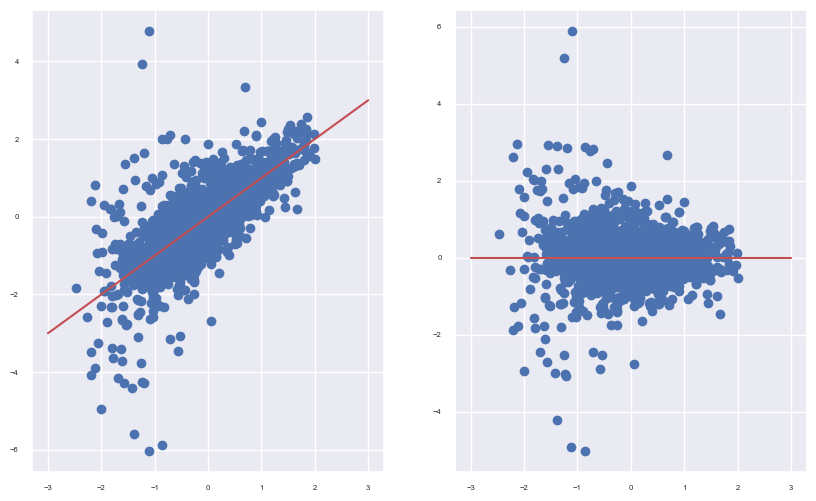

In [198]:
# graph predictions vs test set
yRange = np.linspace(-3, 3)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

ax1.scatter(yJumpPercPredMLP, yTestJumpPerc)
ax1.plot(yRange, yRange, c = 'r')

ax2.scatter(yJumpPercPredMLP, yTestJumpPerc - yJumpPercPredMLP.reshape(yTestJumpPerc.shape))
ax2.plot(yRange, (yRange - yRange), c = 'r')

plt.show()

In [202]:
# Grid Search Random Forest Regressor
rfrParams = {'n_estimators': [500, 1000],
             'max_depth': [10, 20, 30],
             'max_features': ['sqrt', 0.5],
             'min_samples_leaf': [10, 20, 40],
             'min_samples_split': [20, 40, 80],
             'random_state': [1],
             'oob_score': [True],
             'criterion': ['squared_error']}

gsJumpPercRFR = GridSearchCV(RandomForestRegressor(), rfrParams, cv = 5, scoring = ('r2', 'neg_mean_squared_error'), refit = 'r2', return_train_score = True, n_jobs = -1)
gsJumpPercRFR.fit(xTrainJumpPerc, np.ravel(yTrainJumpPerc))

# get cv scores
cvResultsRFRJumpPerc = pd.DataFrame(gsJumpPercRFR.cv_results_)[['params', 'mean_train_r2', 'mean_train_neg_mean_squared_error']]

print('Best r2: ' + str(cvResultsRFRJumpPerc.loc[(cvResultsRFRJumpPerc['params'] == gsJumpPercRFR.best_params_), 'mean_train_r2']))
print('Best RMSE: ' + str(np.sqrt(-1 * (cvResultsRFRJumpPerc.loc[(cvResultsRFRJumpPerc['params'] == gsJumpPercRFR.best_params_), 'mean_train_neg_mean_squared_error']))))
print('Best Params: ' + str(gsJumpPercRFR.best_params_))

Best r2: 91    0.70712
Name: mean_train_r2, dtype: float64
Best RMSE: 91    0.543881
Name: mean_train_neg_mean_squared_error, dtype: float64
Best Params: {'criterion': 'squared_error', 'max_depth': 30, 'max_features': 0.5, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 1000, 'oob_score': True, 'random_state': 1}


In [204]:
# test against the test set
yJumpPercPredRFR = gsJumpPercRFR.predict(xTestJumpPerc)

testJumpPercR2rfr = r2_score(yTestJumpPerc, yJumpPercPredRFR)
testJumpPercRMSErfr = np.sqrt(mean_squared_error(yTestJumpPerc, yJumpPercPredRFR))

print('test RMSE: '+str(testJumpPercRMSErfr))
print('test r2: '+str(testJumpPercR2rfr))

test RMSE: 0.6812627629201635
test r2: 0.5156669404191618


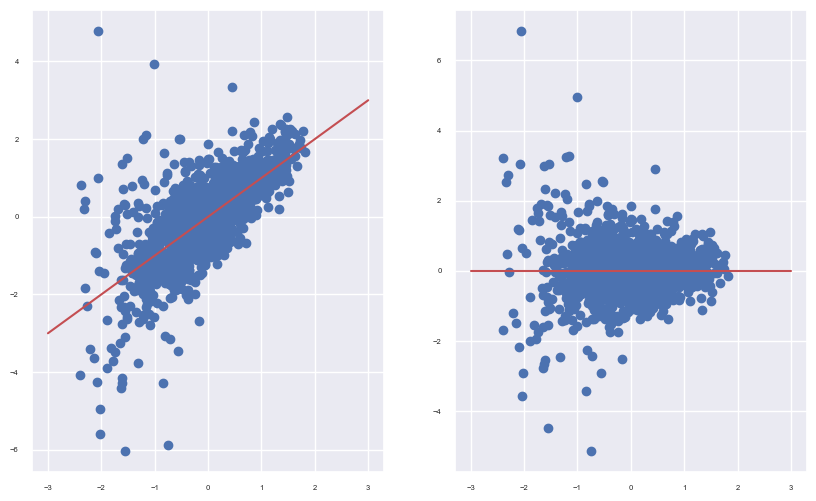

In [208]:
# graph predictions vs test set
yRange = np.linspace(-3, 3)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

ax1.scatter(yJumpPercPredRFR, yTestJumpPerc)
ax1.plot(yRange, yRange, c = 'r')

ax2.scatter(yJumpPercPredRFR, yTestJumpPerc - yJumpPercPredRFR.reshape(yTestJumpPerc.shape))
ax2.plot(yRange, (yRange - yRange), c = 'r')

plt.show()

In [210]:
#look at the variable importance for our analysis
jumpPercVarImpRFR = pd.DataFrame({'features':xTestJumpPerc.columns, 'importance':gsJumpPercRFR.best_estimator_.feature_importances_})

jumpPercVarImpRFR["importance"] = jumpPercVarImpRFR["importance"] / jumpPercVarImpRFR["importance"].sum()

jumpPercVarImpRFR

,features,importance
0,Age,0.032764
1,FGA,0.042214
2,FG%,0.354472
3,FTA,0.031985
4,FT%,0.158122
5,TRB,0.036793
6,AST,0.022074
7,PF,0.028855
8,percJumpshot,0.285387
9,Pos_PF,0.001761


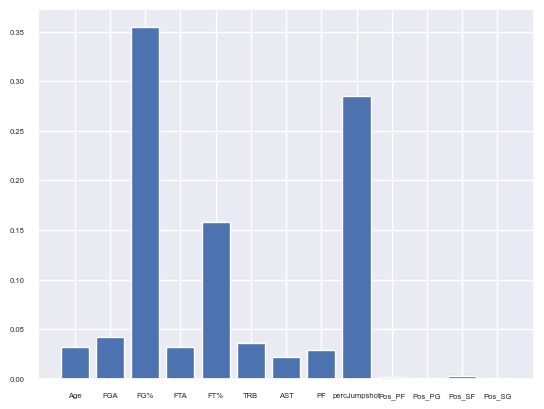

In [212]:
plt.bar(jumpPercVarImpRFR['features'], jumpPercVarImpRFR['importance'])
plt.show()

# Predicting Percentage of FGA that are Jumpshots and Jumpshot Percentage for pre-1980 NBA

In [243]:
def data_processing_pre_1980(year):
    # read in data
    df = pd.read_csv(f"Per_36 Box Score Data/NBA Per_36 Box Score Data {year} - Sheet1.csv")
    df = df[df['MP'] > 375]
    df = df[(df['Team'] != '2TM') | (df['Team'] != '3TM') | (df['Team'] != '4TM') | (df['Team'] != '5TM')]

    # delete unneeded columns
    neededCols = ['Player', 'Age', 'Pos', 'FGA', 'FG%', 'FTA', 'FT%', 'TRB', 'AST', 'PF', 'PTS']
    df = df.loc[:, neededCols]

    # get dummies for position
    dummies = pd.get_dummies(df.iloc[:, 1:], drop_first = True, dtype = 'int')
    df[['Pos_PF', 'Pos_PG', 'Pos_SF', 'Pos_SG']] = dummies[['Pos_PF', 'Pos_PG', 'Pos_SF', 'Pos_SG']]

    # rename Pos into Year
    df['Pos'] = year
    df = df.rename(columns = {'Pos': 'Year'})

    # center and scale
    continCols = ['Age', 'FGA', 'FG%', 'FTA', 'FT%', 'TRB', 'AST', 'PF', 'PTS']
    df.loc[:, continCols] = df.loc[:, continCols].apply(lambda x: boxcox(x + 0.01)[0])
    df.loc[:, continCols] = df.loc[:, continCols].apply(lambda x: scale(x))
    
    return df

In [245]:
df1979 = data_processing_pre_1980(1979)
df1978 = data_processing_pre_1980(1978)
df1977 = data_processing_pre_1980(1977)
df1976 = data_processing_pre_1980(1976)
df1975 = data_processing_pre_1980(1975)
df1974 = data_processing_pre_1980(1974)
df1973 = data_processing_pre_1980(1973)
df1972 = data_processing_pre_1980(1972)
df1971 = data_processing_pre_1980(1971)
df1970 = data_processing_pre_1980(1970)
df1969 = data_processing_pre_1980(1969)
df1968 = data_processing_pre_1980(1968)
df1967 = data_processing_pre_1980(1967)
df1966 = data_processing_pre_1980(1966)
df1965 = data_processing_pre_1980(1965)
df1964 = data_processing_pre_1980(1964)
df1963 = data_processing_pre_1980(1963)
df1962 = data_processing_pre_1980(1962)
df1961 = data_processing_pre_1980(1961)
df1960 = data_processing_pre_1980(1960)
df1959 = data_processing_pre_1980(1959)
df1958 = data_processing_pre_1980(1958)
df1957 = data_processing_pre_1980(1957)
df1956 = data_processing_pre_1980(1956)
df1955 = data_processing_pre_1980(1955)
df1954 = data_processing_pre_1980(1954)
df1953 = data_processing_pre_1980(1953)
df1952 = data_processing_pre_1980(1952)

In [247]:
dfPre1980 = pd.concat([df1979, df1978, df1977, df1976, df1975, df1974, df1973, df1972, df1971, df1970,
                       df1969, df1968, df1967, df1966, df1965, df1964, df1963, df1962, df1961, df1960,
                       df1959, df1958, df1957, df1956, df1955, df1954, df1953, df1952])
dfPre1980.head()

,Player,Age,Year,FGA,FG%,FTA,FT%,TRB,AST,PF,PTS,Pos_PF,Pos_PG,Pos_SF,Pos_SG
0,Moses Malone,-1.038516,1979,0.238220,1.553870,2.199419,-0.118900,2.084073,-1.448441,-1.517126,1.304103,0,0,0,0
1,Artis Gilmore,0.970530,1979,0.324843,2.490042,1.437840,-0.118900,1.388213,-0.184280,-0.688024,1.264455,0,0,0,0
2,M.L. Carr,0.712095,1979,-0.138351,0.898987,0.688922,-0.074674,0.186424,-0.252542,-0.688024,0.309656,0,0,1,0
3,Kareem Abdul-Jabbar,1.423459,1979,0.612881,2.545437,0.944233,-0.151850,1.428653,0.804362,-1.261392,1.323874,0,0,0,0
4,Norm Nixon,-1.038516,1979,-0.022268,1.605675,-1.221087,0.291255,-1.447928,1.891630,-0.907285,0.156114,0,1,0,0


In [249]:
dfPre1980.shape

(4109, 15)

In [251]:
dfPre1980.isna().sum()

Player    0
Age       0
Year      0
FGA       0
FG%       0
FTA       0
FT%       0
TRB       0
AST       0
PF        0
PTS       0
Pos_PF    0
Pos_PG    0
Pos_SF    0
Pos_SG    0
dtype: int64

In [253]:
# use best model to predict % of FGA that are Jumpshots
impColsPercJump = ['Age', 'FG%', 'FTA', 'FT%', 'TRB', 'AST', 'PF', 'PTS', 'Pos_PF', 'Pos_PG', 'Pos_SF', 'Pos_SG']
predictorsPercJump1980 = dfPre1980.loc[:, impColsPercJump]
predictionsPercJump = gsPercJumpSVM.predict(predictorsPercJump1980)
dfPre1980['percJumpshot'] = predictionsPercJump
dfPre1980.head()

,Player,Age,Year,FGA,FG%,FTA,FT%,TRB,AST,PF,PTS,Pos_PF,Pos_PG,Pos_SF,Pos_SG,percJumpshot
0,Moses Malone,-1.038516,1979,0.238220,1.553870,2.199419,-0.118900,2.084073,-1.448441,-1.517126,1.304103,0,0,0,0,-1.726447
1,Artis Gilmore,0.970530,1979,0.324843,2.490042,1.437840,-0.118900,1.388213,-0.184280,-0.688024,1.264455,0,0,0,0,-1.776451
2,M.L. Carr,0.712095,1979,-0.138351,0.898987,0.688922,-0.074674,0.186424,-0.252542,-0.688024,0.309656,0,0,1,0,-0.759513
3,Kareem Abdul-Jabbar,1.423459,1979,0.612881,2.545437,0.944233,-0.151850,1.428653,0.804362,-1.261392,1.323874,0,0,0,0,-1.279736
4,Norm Nixon,-1.038516,1979,-0.022268,1.605675,-1.221087,0.291255,-1.447928,1.891630,-0.907285,0.156114,0,1,0,0,0.245621


In [255]:
# use best model to predict Jumpshot Percentage
impColsJumpPerc = ['Age', 'FGA', 'FG%', 'FTA', 'FT%', 'TRB', 'AST', 'PF', 'percJumpshot', 'Pos_PF', 'Pos_PG', 'Pos_SF', 'Pos_SG']
predictorsJumpPerc1980 = dfPre1980.loc[:, impColsJumpPerc]
predictionsJumpPerc = gsJumpPercSVM.predict(predictorsJumpPerc1980)
dfPre1980['jumpshotPercentage'] = predictionsJumpPerc
dfPre1980.head()

,Player,Age,Year,FGA,FG%,FTA,FT%,TRB,AST,PF,PTS,Pos_PF,Pos_PG,Pos_SF,Pos_SG,percJumpshot,jumpshotPercentage
0,Moses Malone,-1.038516,1979,0.238220,1.553870,2.199419,-0.118900,2.084073,-1.448441,-1.517126,1.304103,0,0,0,0,-1.726447,0.017593
1,Artis Gilmore,0.970530,1979,0.324843,2.490042,1.437840,-0.118900,1.388213,-0.184280,-0.688024,1.264455,0,0,0,0,-1.776451,0.979139
2,M.L. Carr,0.712095,1979,-0.138351,0.898987,0.688922,-0.074674,0.186424,-0.252542,-0.688024,0.309656,0,0,1,0,-0.759513,-0.088009
3,Kareem Abdul-Jabbar,1.423459,1979,0.612881,2.545437,0.944233,-0.151850,1.428653,0.804362,-1.261392,1.323874,0,0,0,0,-1.279736,1.424613
4,Norm Nixon,-1.038516,1979,-0.022268,1.605675,-1.221087,0.291255,-1.447928,1.891630,-0.907285,0.156114,0,1,0,0,0.245621,1.986943


In [257]:
# create shooting talent stat
dfPre1980['shootingTalent'] = dfPre1980['FT%'] + dfPre1980['percJumpshot'] + dfPre1980['jumpshotPercentage']
dfPre1980 = dfPre1980.sort_values('shootingTalent', ascending = False)
dfPre1980.head(15)

,Player,Age,Year,FGA,FG%,FTA,FT%,TRB,AST,PF,PTS,Pos_PF,Pos_PG,Pos_SF,Pos_SG,percJumpshot,jumpshotPercentage,shootingTalent
83,Jon McGlocklin,0.572168,1972,-0.492888,1.420902,-2.117105,1.746183,-1.470013,0.485661,-1.420912,-0.308409,0,0,0,1,1.503046,2.704939,5.954168
30,Jon McGlocklin,0.310718,1971,-0.221613,2.236181,-2.009240,1.870634,-1.638345,0.421693,-1.594801,0.135116,0,0,0,1,1.232009,2.668056,5.770699
86,Jon McGlocklin,1.008584,1974,0.035651,0.467221,-1.888809,2.033821,-1.504347,0.695719,-1.491919,-0.143856,0,0,0,1,1.787239,1.926430,5.747490
89,Jon McGlocklin,0.775860,1973,-0.280111,1.182509,-2.399365,1.517683,-1.505120,0.697459,-1.584752,-0.198992,0,0,0,1,1.683688,2.449535,5.650905
17,Bill Sharman,1.823084,1959,1.756104,0.614377,0.286267,3.232528,-1.461037,0.123108,-1.318302,1.569046,0,0,0,1,1.253562,1.069285,5.555374
104,Jon McGlocklin,1.293775,1975,-0.017977,1.196801,-2.102731,1.567485,-1.789602,1.039469,-1.162602,-0.050378,0,0,0,1,1.699796,2.239172,5.506453
18,Calvin Murphy,1.026114,1978,2.223276,0.780039,-0.361781,2.602325,-1.975252,0.017945,-0.858078,1.917319,0,0,0,1,1.426748,1.429402,5.458475
20,Bill Sharman,0.700950,1955,1.157726,1.397605,0.495505,2.621111,-1.150694,0.689513,-0.631305,1.390909,0,0,0,1,0.830815,1.948440,5.400366
282,Joe Hassett,-1.038516,1979,0.899890,-0.041385,-1.811379,3.500453,-0.972833,0.007673,0.580133,0.417852,0,0,0,1,0.983649,0.842353,5.326455
52,Bill Sharman,2.273023,1961,1.539119,0.454737,0.204772,2.671808,-1.061013,0.165765,-1.041436,1.338024,0,0,0,1,1.439213,1.208893,5.319914


In [259]:
careerShootingTalent = dfPre1980.groupby('Player').mean()['shootingTalent']

In [261]:
careerShootingTalent = careerShootingTalent.sort_values(ascending = False)
careerShootingTalent.head(15)

Player
Dennis Hamilton    5.252732
Bill Sharman       4.939804
Don Smith          4.646431
Jon McGlocklin     4.582353
Vince Boryla       4.220450
Joe Hassett        4.107560
Rick Barry         4.033877
Calvin Murphy      3.997083
Bob Arnzen         3.961903
Fred Brown         3.876389
Bud Koper          3.721490
Mike Glenn         3.647642
Whitey Skoog       3.595274
Claude Terry       3.499699
Carl Braun         3.458055
Name: shootingTalent, dtype: float64

In [263]:
careerShootingTalent['Oscar Robertson']

2.658017751491365

In [265]:
dfPre1980[dfPre1980['Player'] == 'Bill Sharman']

,Player,Age,Year,FGA,FG%,FTA,FT%,TRB,AST,PF,PTS,Pos_PF,Pos_PG,Pos_SF,Pos_SG,percJumpshot,jumpshotPercentage,shootingTalent
17,Bill Sharman,1.823084,1959,1.756104,0.614377,0.286267,3.232528,-1.461037,0.123108,-1.318302,1.569046,0,0,0,1,1.253562,1.069285,5.555374
20,Bill Sharman,0.700950,1955,1.157726,1.397605,0.495505,2.621111,-1.150694,0.689513,-0.631305,1.390909,0,0,0,1,0.830815,1.948440,5.400366
52,Bill Sharman,2.273023,1961,1.539119,0.454737,0.204772,2.671808,-1.061013,0.165765,-1.041436,1.338024,0,0,0,1,1.439213,1.208893,5.319914
8,Bill Sharman,0.952530,1956,1.125841,1.605943,0.304370,2.173839,-1.527750,0.832627,-1.435836,1.408042,0,0,0,1,0.971759,2.057657,5.203255
13,Bill Sharman,1.155957,1957,1.625360,1.278725,0.680892,2.495188,-1.270323,0.794176,-0.980435,1.690692,0,0,0,1,0.928015,1.766180,5.189384
22,Bill Sharman,1.381933,1958,2.027668,1.304508,0.209309,2.073201,-1.251185,0.190282,-1.578747,1.730692,0,0,0,1,1.160313,1.752516,4.986031
16,Bill Sharman,0.355715,1954,1.013170,2.264506,0.648956,2.137904,-1.078698,0.474578,-0.780834,1.674149,0,0,0,1,0.502696,2.183352,4.823952
38,Bill Sharman,1.849750,1960,1.978438,1.401397,0.445220,1.881916,-1.322643,0.104366,-1.020678,1.862320,0,0,0,1,1.045556,1.698249,4.625720
25,Bill Sharman,-0.133936,1953,1.252711,1.849034,0.774963,1.885775,-0.782187,0.017069,-0.585837,1.909824,0,0,0,1,0.446156,2.071193,4.403123
68,Bill Sharman,-0.434501,1952,1.592240,0.668393,0.516389,1.853971,-0.304640,0.807888,0.444664,1.688640,0,0,0,1,0.624177,1.412769,3.890917
